In [3]:
import pandas as pd

In [13]:
#マルチチャネルデータのインポート
マルチチャネルデータ=pd.read_excel('Z:\\講演会チャネル調査\\DA3_マルチチャネルアクティビティ(サマリー)_RI_v2.2.xlsx',header=0)

In [14]:
len(マルチチャネルデータ)

166838

In [15]:
マルチチャネルデータ.groupby('レコードタイプ NAME')['回数（重複なし）'].sum()

レコードタイプ NAME
HP講演会（視聴）           6654
M3講演会（視聴）          32092
Nikkei講演会（視聴）       2180
ケアネットコンテンツ（視聴）    116482
ケアネット講演会（視聴）        2318
メドピア（視聴）            7112
Name: 回数（重複なし）, dtype: int64

In [6]:
#マルチチャネルデータのインポート
RW医師リスト=pd.read_excel('Z:\\講演会チャネル調査\\OA2_RW医師リスト_v2.2.xlsx',header=0)

In [18]:
RW医師リスト.columns

Index(['DCF施設コード(ULT) ID', 'DCF施設コード(ULT) SORT', '施設 ID', '施設 DESC',
       'DCF医師コード(ULT) ID', '医師 ID', 'メトリック', 'アディノベイトR', 'アディノベイトW',
       'アディノベイトGR', 'アドベイトR', 'アドベイトW', 'アドベイトGR', 'ファイバR', 'アグリリンR', 'ビプリブR',
       'ビプリブW', 'ビプリブGR', 'フィラジルR', 'フィラジルW', 'ボンベンディR', 'ボンベンディW',
       'ボンベンディGR'],
      dtype='object')

In [7]:
RW医師リスト_tmp=RW医師リスト.groupby(['医師 ID'],as_index=False)['アディノベイトR', 'アディノベイトW',
       'アディノベイトGR', 'アドベイトR', 'アドベイトW', 'アドベイトGR', 'ファイバR', 'アグリリンR', 'ビプリブR',
       'ビプリブW', 'ビプリブGR', 'フィラジルR', 'フィラジルW', 'ボンベンディR', 'ボンベンディW',
       'ボンベンディGR'].sum()
RW医師リスト_tmp.loc[(RW医師リスト_tmp['アディノベイトR']!=0) | (RW医師リスト_tmp['アディノベイトW']!=0) | (RW医師リスト_tmp['アディノベイトGR']!=0),'アディノベイト']=1
RW医師リスト_tmp.loc[(RW医師リスト_tmp['アドベイトW']!=0) | (RW医師リスト_tmp['アドベイトGR']!=0),'アドベイト']=1
RW医師リスト_tmp.loc[(RW医師リスト_tmp['ファイバR']!=0),'ファイバ']=1
RW医師リスト_tmp.loc[(RW医師リスト_tmp['アグリリンR']!=0),'アグリリン']=1
RW医師リスト_tmp.loc[(RW医師リスト_tmp['ビプリブR']!=0) | (RW医師リスト_tmp['ビプリブW']!=0) | (RW医師リスト_tmp['ビプリブGR']!=0),'ビプリブ']=1
RW医師リスト_tmp.loc[(RW医師リスト_tmp['フィラジルR']!=0) | (RW医師リスト_tmp['フィラジルW']!=0),'フィラジル']=1
RW医師リスト_tmp.loc[(RW医師リスト_tmp['ボンベンディR']!=0) | (RW医師リスト_tmp['ボンベンディW']!=0) | (RW医師リスト_tmp['ボンベンディGR']!=0),'ボンベンディ']=1
RW医師リスト_new=RW医師リスト_tmp.fillna(0)

In [57]:
マルチチャネルデータ.columns

Index(['RDBU_RHエリア SORT', 'RDBU_RHエリア DESC', '主担当MR_RDBU_RH ID',
       '主担当MR_RDBU_RH DESC', 'RDBU_RIエリア SORT', 'RDBU_RIエリア DESC',
       '主担当MR_RDBU_RI ID', '主担当MR_RDBU_RI DESC', 'RDBU_RMエリア SORT',
       'RDBU_RMエリア DESC', '主担当MR_RDBU_RM DESC', '都道府県 ID', '都道府県 DESC',
       'UHP区分 DESC', '重点対象区分 DESC', '施設(全施設)_DCFコード ID', '施設(全施設) ID',
       '施設(全施設) DESC', '医師DCFコード ID', '医師 ID', '医師 DESC', '日 ID', '開催日/配信日 ID',
       '品目 DESC', '品目 統計品目コード', 'チャネル区分 ID', 'チャネル区分 DESC', 'パブリケーションタイプ ID',
       'パブリケーションタイプ DESC', 'ステータス ID', 'ステータス DESC', 'ステータス SORT',
       'レコードタイプ NAME', 'タイトル ID', '回数（重複なし）'],
      dtype='object')

In [85]:
マルチチャネルデータ_new=pd.merge(マルチチャネルデータ,RW医師リスト_new,on="医師 ID",how="left")

In [ ]:
マルチチャネルデータ_new.to_excel('Z:\\講演会チャネル調査\\マルチチャネルデータ_new.xlsx', encoding='utf_8_sig')

In [8]:
マルチチャネルデータ_new=pd.read_excel('Z:\\講演会チャネル調査\\マルチチャネルデータ_new.xlsx', encoding='utf_8_sig')

In [89]:
マルチチャネルデータ_new['品目 DESC'].unique()

array(['アディノベイト', 'ファイバ', 'アグリリン', 'ビプリブ', 'フィラジル', 'ボンベンディ', 'アドベイト'],
      dtype=object)

In [9]:
#積上棒グラフに数値を表示するための関数定義　https://qiita.com/CinnamonJP/items/24aa416ce697530d99c0

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

def annotating_plots(ax = None, formatter = None, orientation = 'v', stacked = False, kind = 'bar', 
                     fontsize = 12, colors = None, weight='medium', rotation = 0, total=False):
    if ax is None:
        # axisが指定されていない場合、現在描画されているオブジェクトから取得する
        ax = plt.gca()

    if formatter is None:
        #デフォルトでは、数値をそのまま文字列として出力する
        formatter = lambda x : str(x)

    elif formatter == 'percent':
        # データラベルの表現が文字列でpercentと指定された場合、formatterを設定する
        formatter = lambda x : '{:.{}f}%'.format(x*100, 1)


    if colors is None:
        # 色が指定されていない場合、全て黒にする
        colors = ['black' for _ in range(len(ax.patches))]

    elif isinstance(colors, str):
        if colors != 'auto':
            # 色が文字列で指定されている場合、これを全てのデータラベルにブロードキャストする
            colors = [colors for _ in range(len(ax.patches))]

        else:
            #colors = 'auto'は、Stacked bar向けのオプション。rgbを輝度に変換し、0.5以下なら白字にする
            colors = ['white' if np.dot([0.3, 0.6, 0.1],p.get_facecolor()[:3]) <= 0.5 else 'black' for p in ax.patches]


    if kind == 'bar':
        # 棒グラフの場合
        if orientation == 'v':
            if not stacked:
                # Grouped bar
                for cnt, p in enumerate(ax.patches):
                    ax.annotate(formatter(p.get_height()),
                                (p.get_x() + p.get_width()/2, p.get_height()*1.005),
                                ha='center', 
                                va='bottom',
                                fontsize=fontsize,
                                color = colors[cnt],
                                weight = weight,
                                rotation = rotation
                                )

            else:
                # Stacked barはoffsetが必要なため、offsetデータ格納用配列を定義する
                length = pd.Series([p.get_x() for p in ax.patches]).nunique() #axisの長さ
                offset = np.zeros(length)
                for cnt, p in enumerate(ax.patches):
                    ax.annotate(formatter(p.get_height()),
                                (p.get_x() + p.get_width()/2, p.get_height()/2 + offset[cnt%length]),
                                horizontalalignment='center',
                                verticalalignment='center',
                                color = colors[cnt],
                                size = fontsize,
                                weight = weight,
                                rotation = rotation
                                )
                    offset[cnt%length] += p.get_height()
                if total:
                    # Stacked barに対し、合計値を表示
                    for idx, p in zip(range(length), ax.patches):
                        ax.annotate(formatter(offset[idx]), 
                                    (p.get_x() + p.get_width()/2, offset[idx]),
                                    horizontalalignment='center',
                                    verticalalignment='bottom',
                                    weight = weight,
                                    rotation = rotation
                                    )               

        elif orientation == 'h':
            if not stacked:
                for cnt, p in enumerate(ax.patches):
                    ax.annotate(formatter(p.get_width()),
                                (p.get_width(),p.get_y() + p.get_height()/2),
                                horizontalalignment='left',
                                verticalalignment='center',
                                fontsize=fontsize,
                                color = colors[cnt],
                                weight = weight,
                                rotation = rotation
                                )

            else:
                # Stacked barはoffsetが必要なため、offsetデータ格納用配列を定義する
                length = pd.Series([p.get_y() for p in ax.patches]).nunique() #axisの長さ
                offset = np.zeros(length)
                for cnt, p in enumerate(ax.patches):
                    ax.annotate(formatter(p.get_width()),
                                (p.get_width()/2 + offset[cnt%length], p.get_y() + p.get_height()/2),
                                horizontalalignment='center',
                                verticalalignment='center',
                                color = colors[cnt],
                                size = fontsize,
                                weight = weight,
                                rotation = rotation
                                )
                    offset[cnt%length] += p.get_width()
                if total:
                    # Stacked barに対し、合計値を表示
                    for idx, p in zip(range(length), ax.patches):
                        ax.annotate(formatter(offset[idx]), 
                                    (offset[idx],
                                    p.get_y() + p.get_height()/2),
                                    horizontalalignment='left',
                                    verticalalignment='center',
                                    weight = weight,
                                    rotation = rotation
                                    )

In [32]:
アドベイトF

,レコードタイプ NAME,アドベイトFコンテンツ視聴RW医師数,アドベイトF以外コンテンツ視聴RW医師数,アドベイトFコンテンツ視聴RW医師割合,アドベイトF以外コンテンツ視聴RW医師割合,ALLProduct視聴RW医師割合
0,HP講演会（視聴）,26.0,22,0.027140,0.022965,0.050104
1,M3講演会（視聴）,213.0,24,0.222338,0.025052,0.247390
2,ケアネットコンテンツ（視聴）,87.0,33,0.090814,0.034447,0.125261
3,Nikkei講演会（視聴）,0.0,40,0.000000,0.041754,0.041754
4,ケアネット講演会（視聴）,0.0,22,0.000000,0.022965,0.022965
5,メドピア（視聴）,0.0,22,0.000000,0.022965,0.022965


In [50]:
アドベイトF医師リスト=マルチチャネルデータ_new.loc[((マルチチャネルデータ_new['品目 DESC']=="アディノベイト") | (マルチチャネルデータ_new['品目 DESC']=="アドベイト")) & ((マルチチャネルデータ_new['アディノベイト']==1) | (マルチチャネルデータ_new['アドベイト']==1))].groupby(['レコードタイプ NAME','医師 ID'],as_index=False).count()              
アドベイトF1=pd.DataFrame(アドベイトF医師リスト.groupby(['レコードタイプ NAME'],as_index=False)['RDBU_RHエリア SORT'].count()).rename(columns={'RDBU_RHエリア SORT':'アドベイトFコンテンツ視聴RW医師数'})        
アドベイトF以外医師リストtmp=マルチチャネルデータ_new.loc[((マルチチャネルデータ_new['品目 DESC']!="アディノベイト") & (マルチチャネルデータ_new['品目 DESC']!="アドベイト")) & ((マルチチャネルデータ_new['アディノベイト']==1) | (マルチチャネルデータ_new['アドベイト']==1))].groupby(['レコードタイプ NAME','医師 ID'],as_index=False).count()                         
アドベイトF以外医師リストtmp2=pd.merge(アドベイトF以外医師リストtmp,アドベイトF医師リスト,on=['レコードタイプ NAME','医師 ID'],how="left")
アドベイトF以外医師リスト=アドベイトF以外医師リストtmp2.loc[アドベイトF以外医師リストtmp2['Unnamed: 0_y'].isna()==True]
アドベイトF2=pd.DataFrame(アドベイトF以外医師リスト.groupby(['レコードタイプ NAME'],as_index=False)['RDBU_RHエリア SORT_x'].count()).rename(columns={'RDBU_RHエリア SORT_x':'アドベイトF以外コンテンツ視聴RW医師数'})

アドベイトF=pd.merge(アドベイトF1,アドベイトF2,on="レコードタイプ NAME",how="outer")
RW医師数=len(RW医師リスト_new.loc[(RW医師リスト_new['アディノベイト']!=0) | (RW医師リスト_new['アドベイト']!=0)])
アドベイトF['アドベイトFコンテンツ視聴RW医師割合']=アドベイトF['アドベイトFコンテンツ視聴RW医師数'] / RW医師数
アドベイトF['アドベイトF以外コンテンツ視聴RW医師割合']=アドベイトF['アドベイトF以外コンテンツ視聴RW医師数'] / RW医師数
アドベイトF=アドベイトF.fillna(0).sort_values(['レコードタイプ NAME'])
アドベイトF['ALLProduct視聴RW医師割合']=アドベイトF['アドベイトFコンテンツ視聴RW医師割合']+アドベイトF['アドベイトF以外コンテンツ視聴RW医師割合']
アドベイトF=アドベイトF[アドベイトF['レコードタイプ NAME']!="ケアネットコンテンツ（視聴）"]

In [38]:
order.index

<function list.index(value, start=0, stop=9223372036854775807, /)>

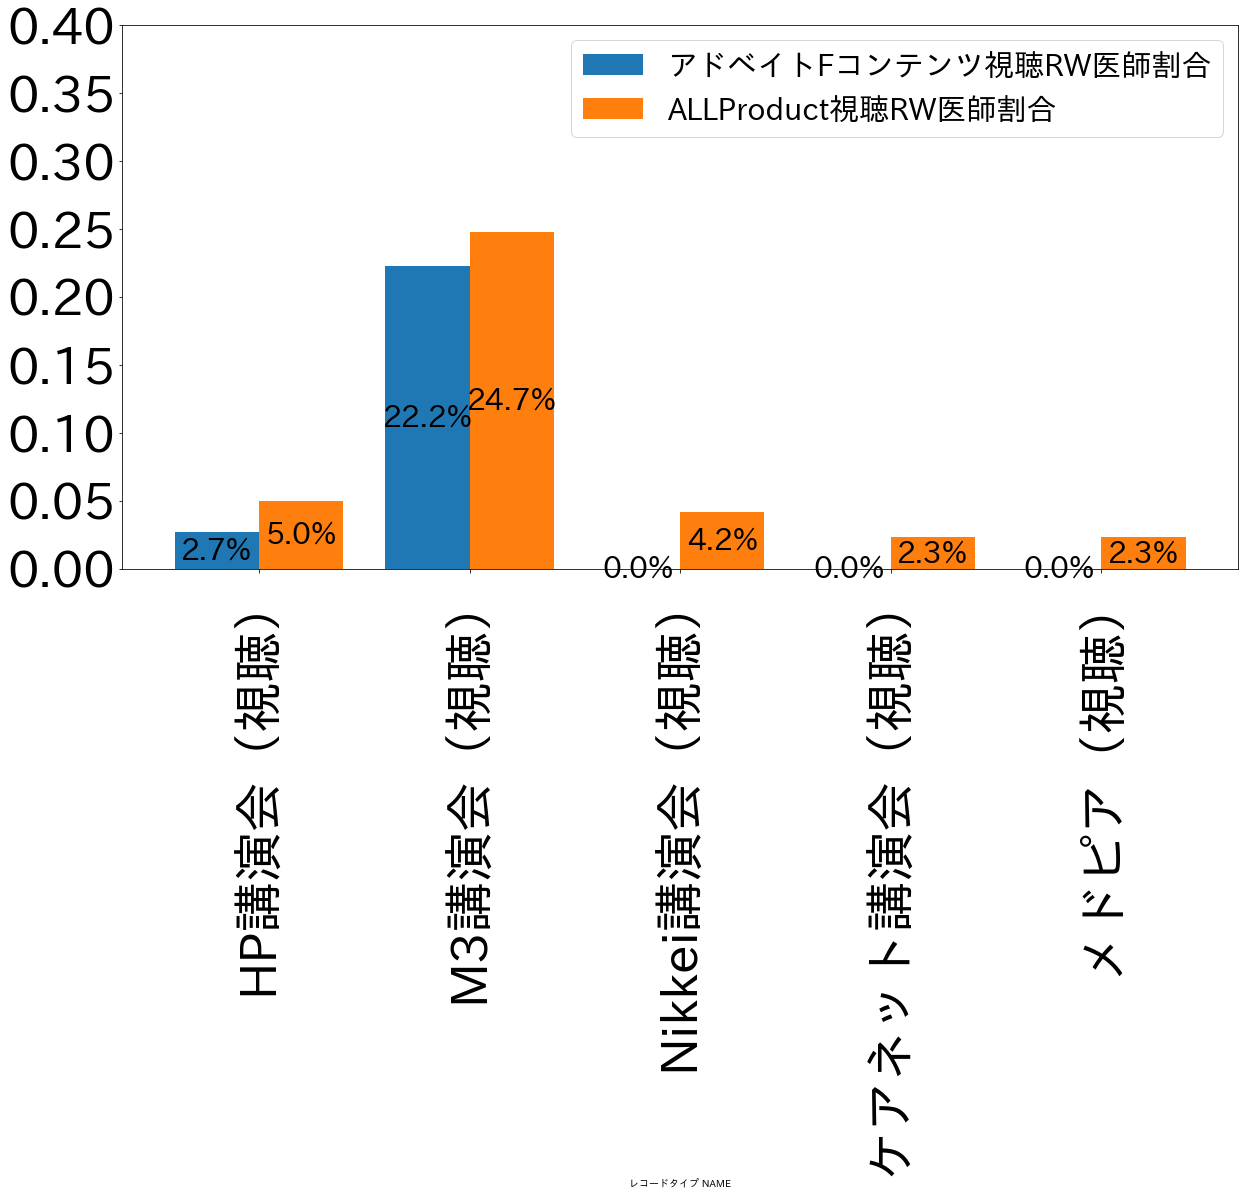

In [68]:
アドベイトF_new=アドベイトF[['レコードタイプ NAME','アドベイトFコンテンツ視聴RW医師割合','ALLProduct視聴RW医師割合']].set_index(['レコードタイプ NAME']).fillna(0)
アドベイトF_new.plot(kind='bar',stacked=False,figsize=(20, 10),width=0.8)
# leg = plt.legend(loc=4, bbox_to_anchor=(1.3, 0.3),prop={'family':'Yu Gothic','weight':'light','size':20})
### グラフ表示
plt.ylim(0,0.4) #y軸範囲指定
plt.xticks(fontsize =50)
plt.yticks(fontsize =50)
annotating_plots(formatter='percent',stacked = True,colors = 'black',fontsize=30)
plt.legend(fontsize=30) 
plt.show()

In [35]:
list=['ファイバ', 'アグリリン', 'ビプリブ', 'フィラジル', 'ボンベンディ']

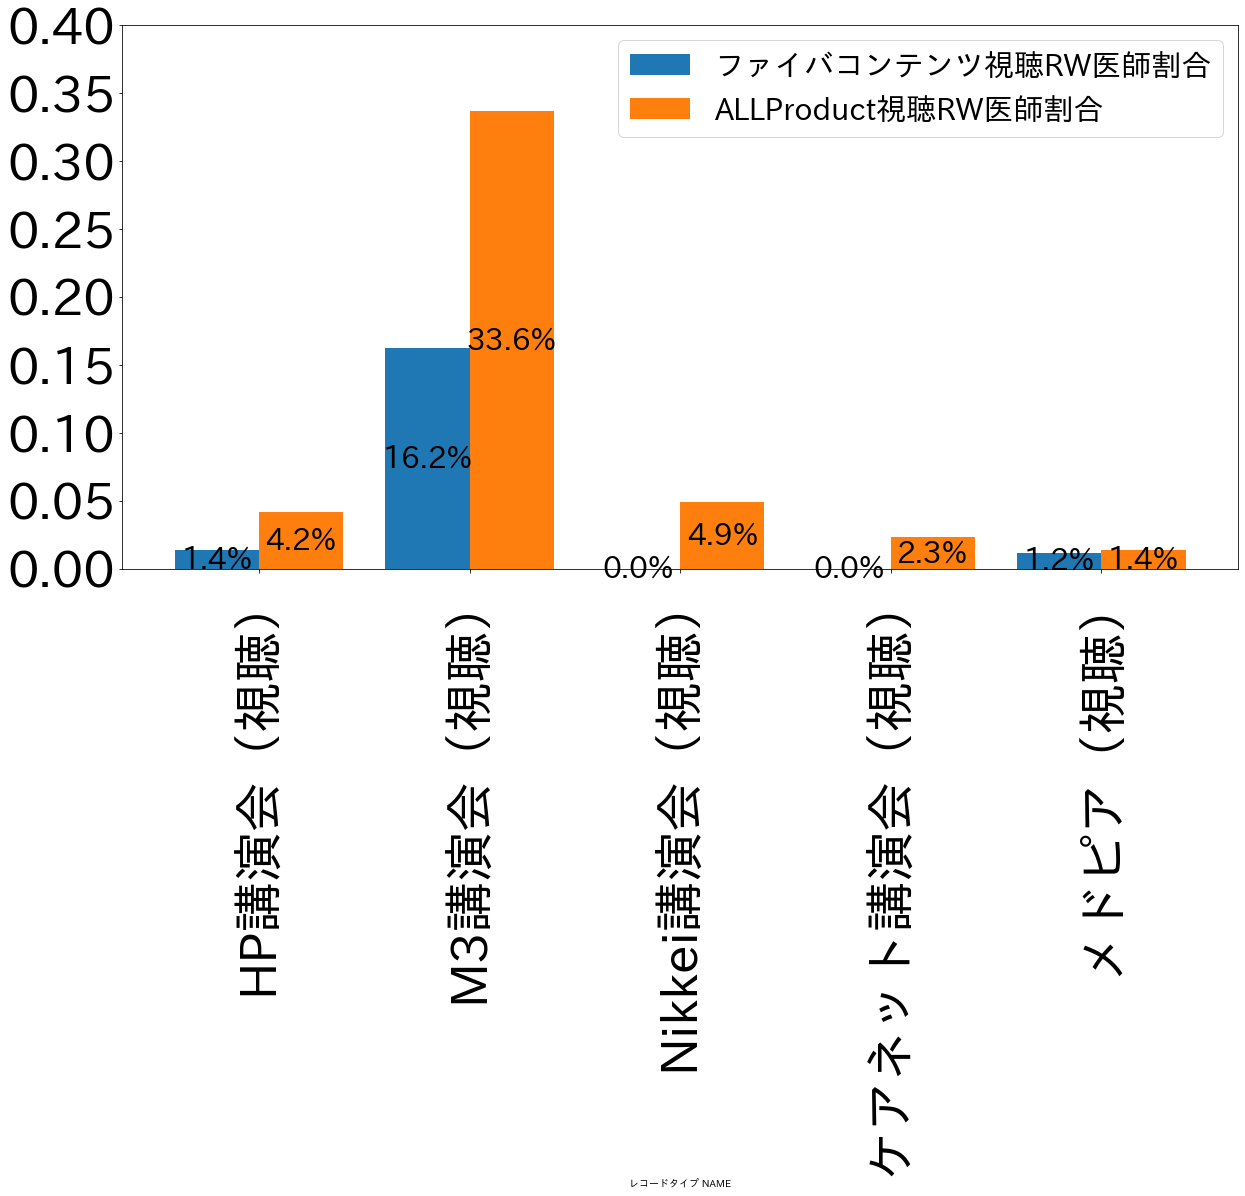

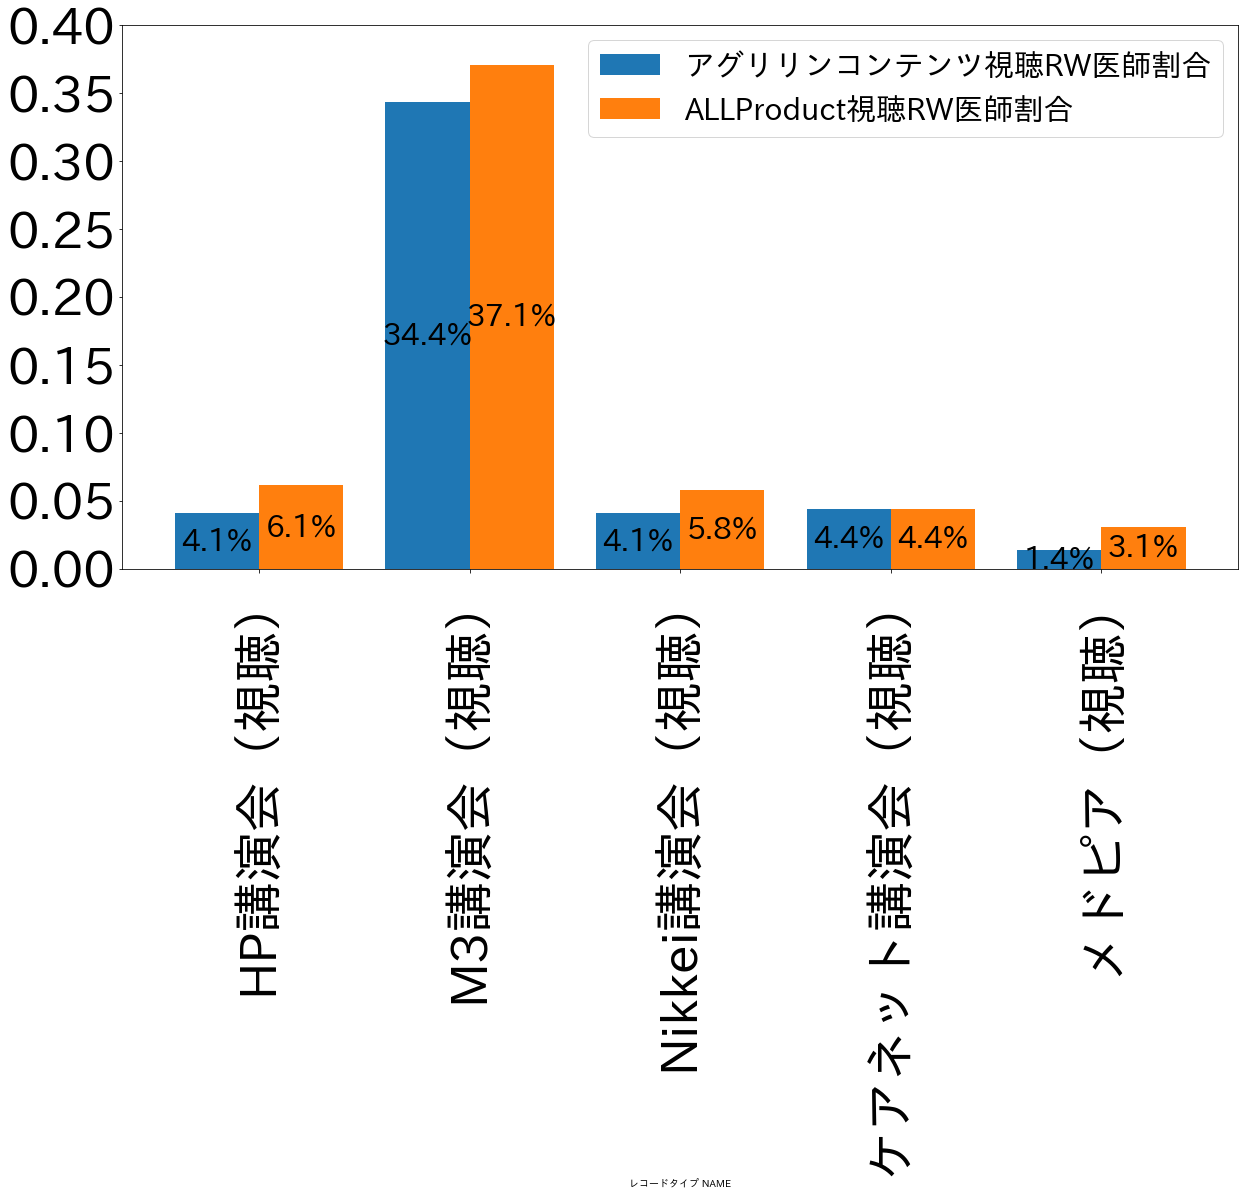

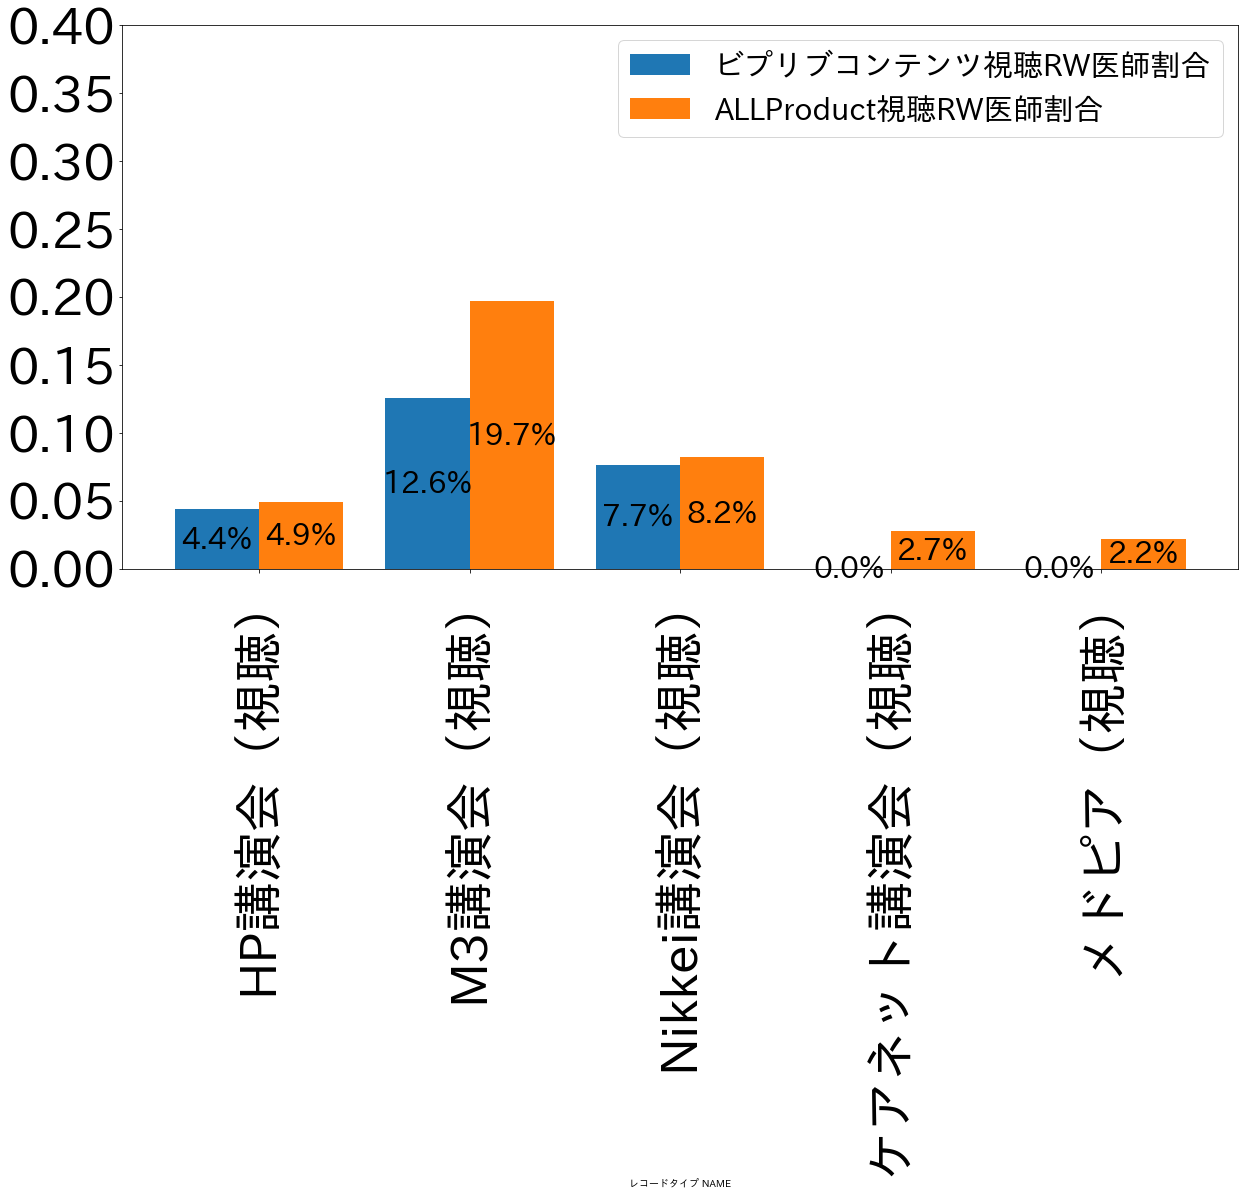

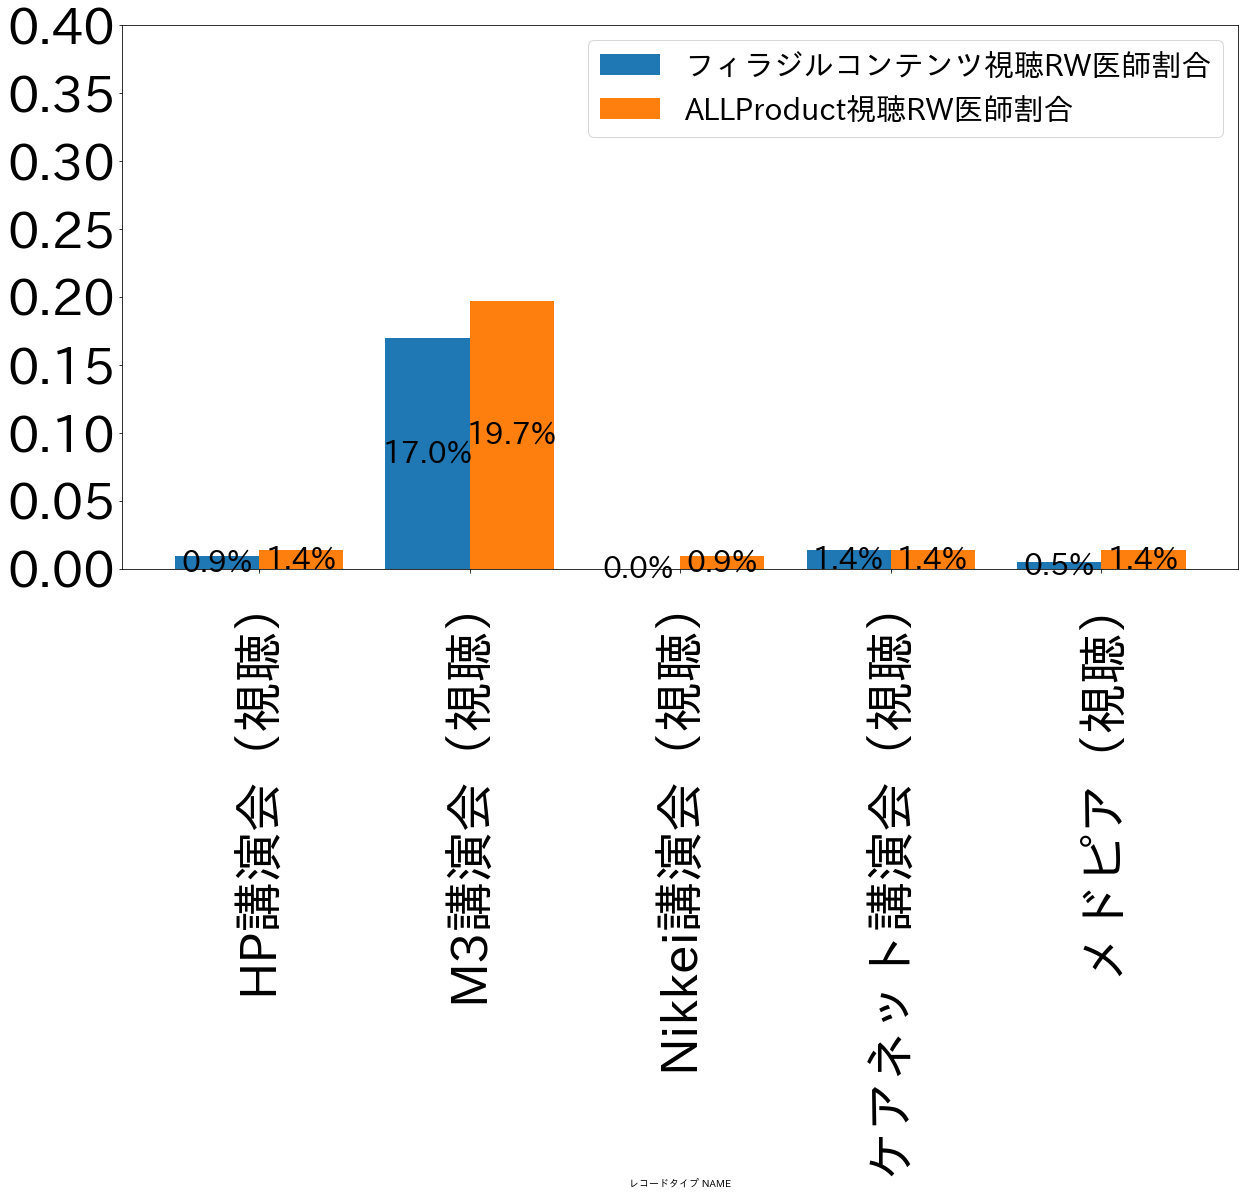

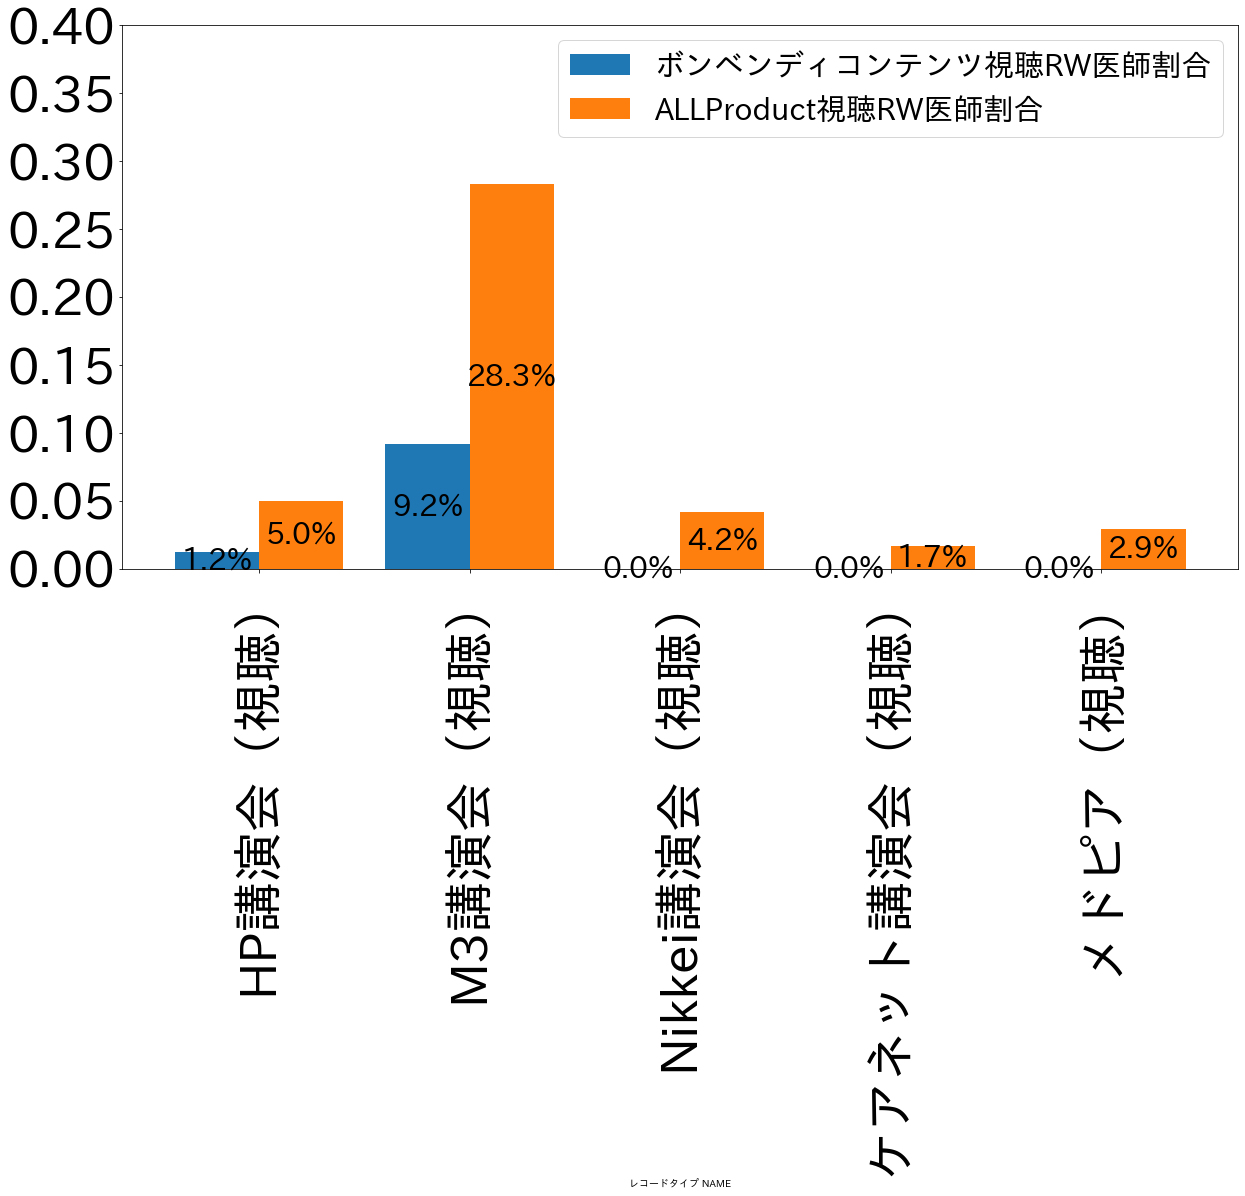

In [69]:
for i in list:
    Product医師リスト=マルチチャネルデータ_new.loc[(マルチチャネルデータ_new['品目 DESC']==i) & (マルチチャネルデータ_new[i]==1)].groupby(['レコードタイプ NAME','医師 ID'],as_index=False).count()              
    Product1=pd.DataFrame(Product医師リスト.groupby(['レコードタイプ NAME'],as_index=False)['RDBU_RHエリア SORT'].count()).rename(columns={'RDBU_RHエリア SORT':i+'コンテンツ視聴RW医師数'})        
    Product以外医師リストtmp=マルチチャネルデータ_new.loc[(マルチチャネルデータ_new['品目 DESC']!=i) & (マルチチャネルデータ_new[i]==1)].groupby(['レコードタイプ NAME','医師 ID'],as_index=False).count()                         
    Product以外医師リストtmp2=pd.merge(Product以外医師リストtmp,Product医師リスト,on=['レコードタイプ NAME','医師 ID'],how="left")
    Product以外医師リスト=Product以外医師リストtmp2.loc[Product以外医師リストtmp2['Unnamed: 0_y'].isna()==True]
    Product2=pd.DataFrame(Product以外医師リスト.groupby(['レコードタイプ NAME'],as_index=False)['RDBU_RHエリア SORT_x'].count()).rename(columns={'RDBU_RHエリア SORT_x':i+'以外コンテンツ視聴RW医師数'})
    Product=pd.merge(Product1,Product2,on="レコードタイプ NAME",how="outer")
    RW医師数=len(RW医師リスト_new.loc[RW医師リスト_new[i]!=0])
    Product[i+'コンテンツ視聴RW医師割合']=Product[i+'コンテンツ視聴RW医師数'] / RW医師数
    Product[i+'以外コンテンツ視聴RW医師割合']=Product[i+'以外コンテンツ視聴RW医師数'] / RW医師数
    Product=Product.fillna(0).sort_values(['レコードタイプ NAME'])
    Product['ALLProduct視聴RW医師割合']=Product[i+'コンテンツ視聴RW医師割合']+Product[i+'以外コンテンツ視聴RW医師割合']
    Product=Product[Product['レコードタイプ NAME']!="ケアネットコンテンツ（視聴）"]
    Product_new=Product[['レコードタイプ NAME',i+'コンテンツ視聴RW医師割合','ALLProduct視聴RW医師割合']].set_index(['レコードタイプ NAME']).fillna(0)
    Product_new.plot(kind='bar',stacked=False,figsize=(20, 10),width=0.8)
    # leg = plt.legend(loc=4, bbox_to_anchor=(1.3, 0.3),prop={'family':'Yu Gothic','weight':'light','size':20})
    ### グラフ表示
    plt.ylim(0,0.4) #y軸範囲指定
    plt.xticks(fontsize =50)
    plt.yticks(fontsize =50)
    annotating_plots(formatter='percent',stacked = True,colors = 'black',fontsize=30)
    plt.legend(fontsize=30) 
    plt.show()

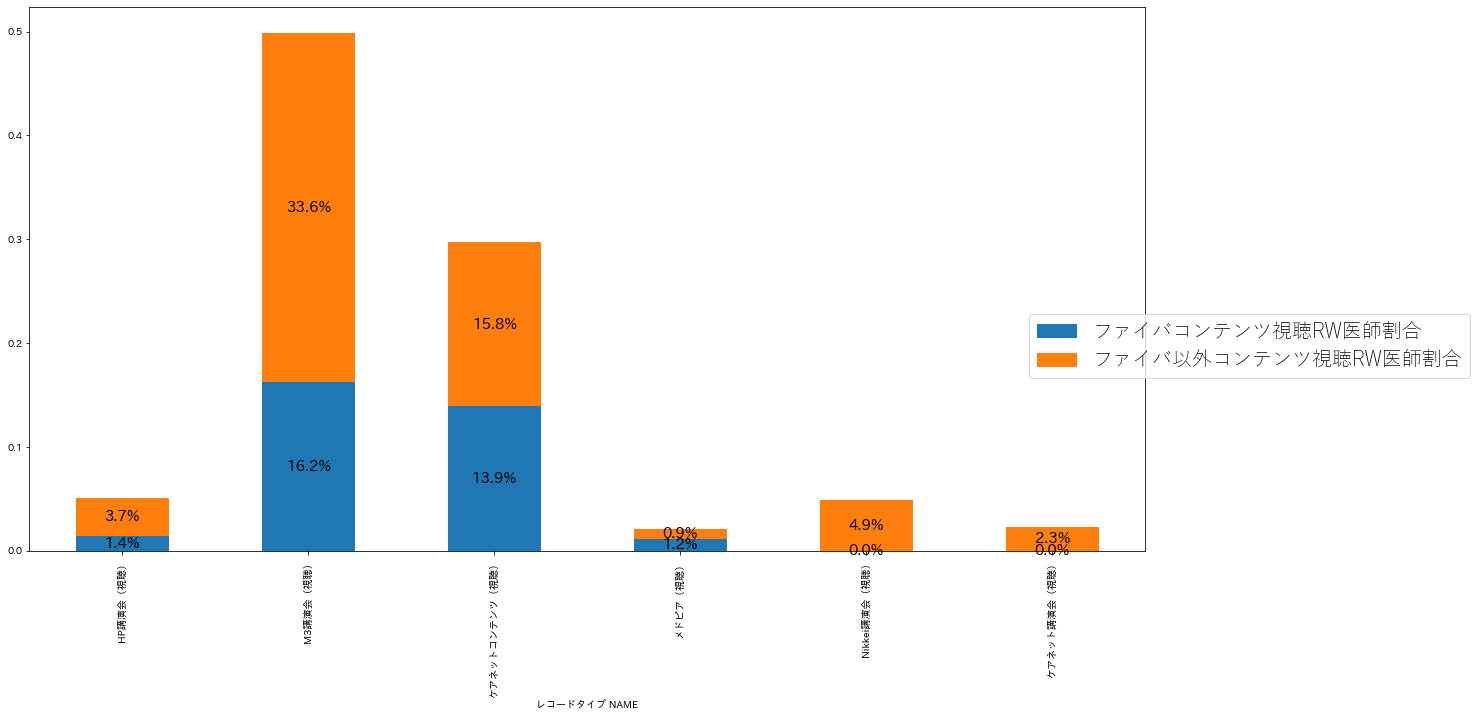

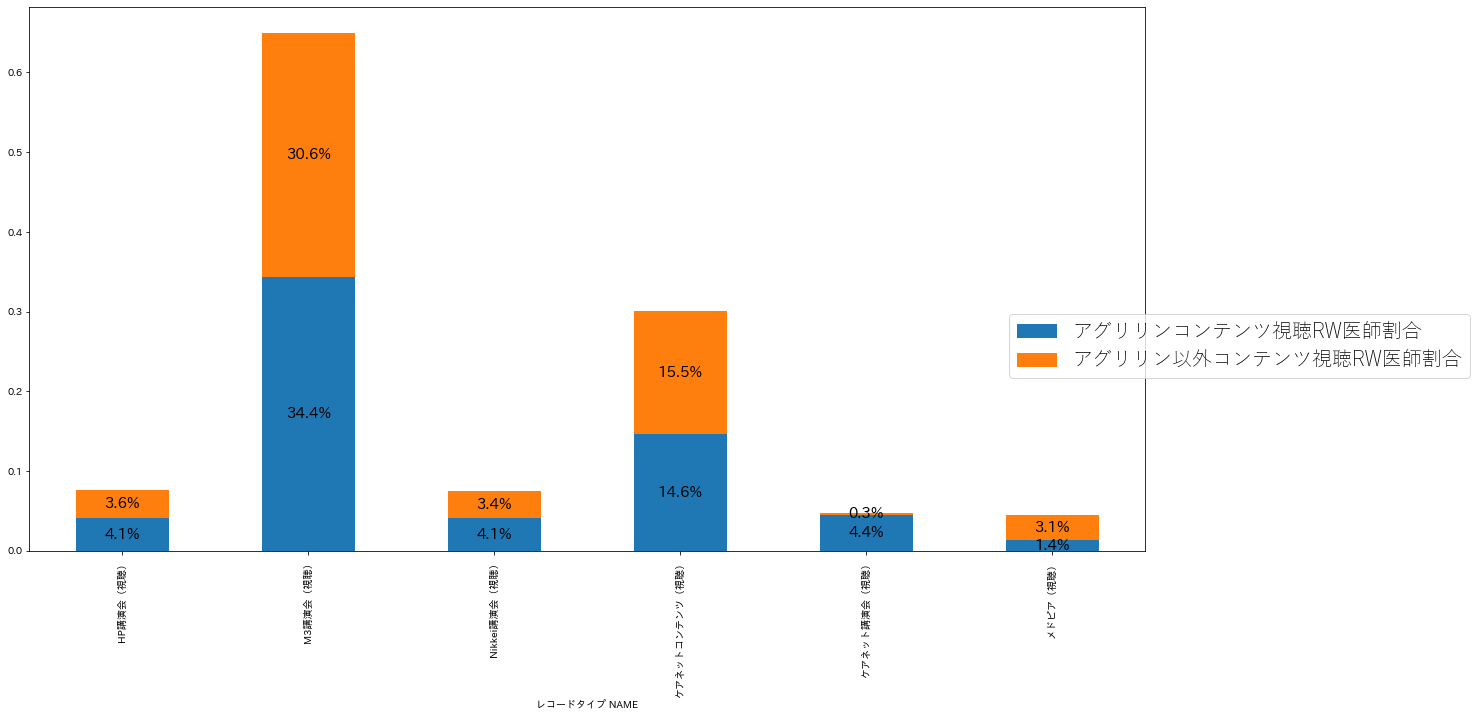

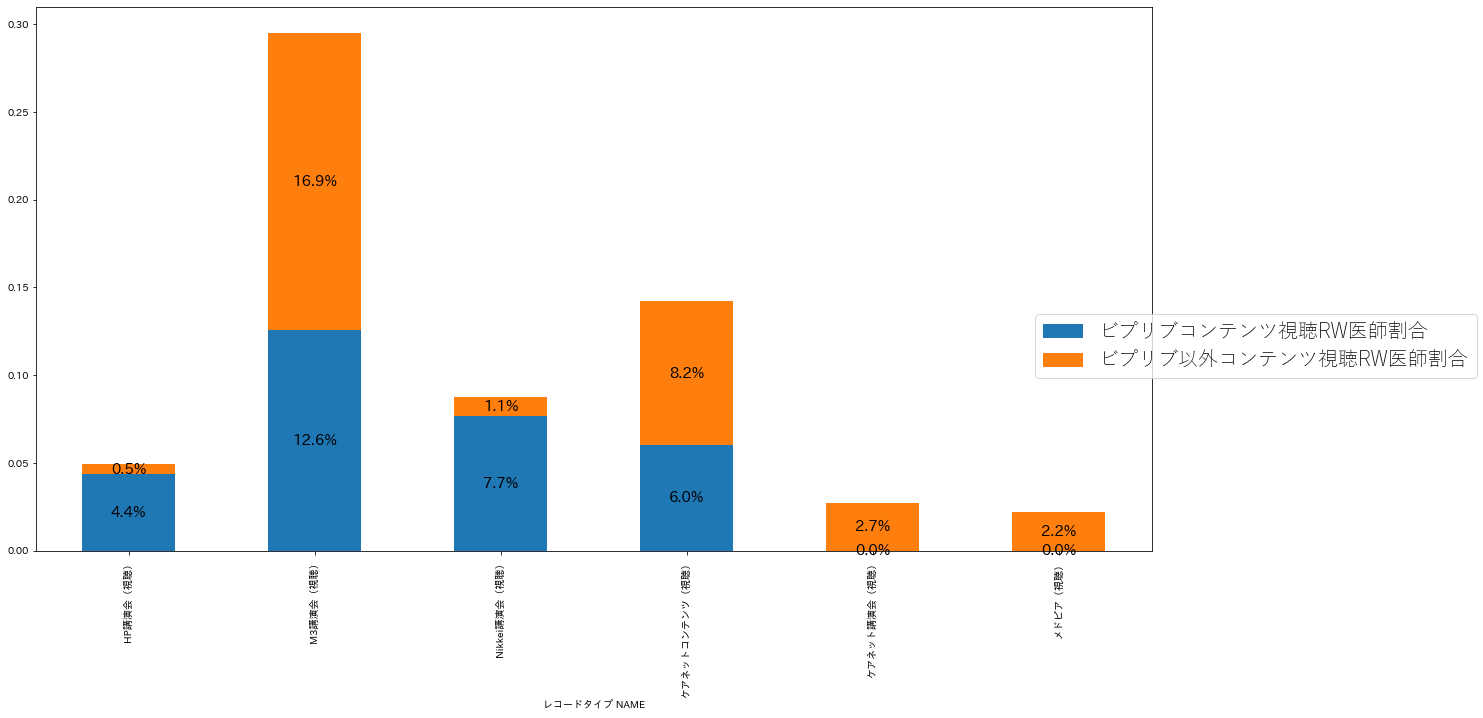

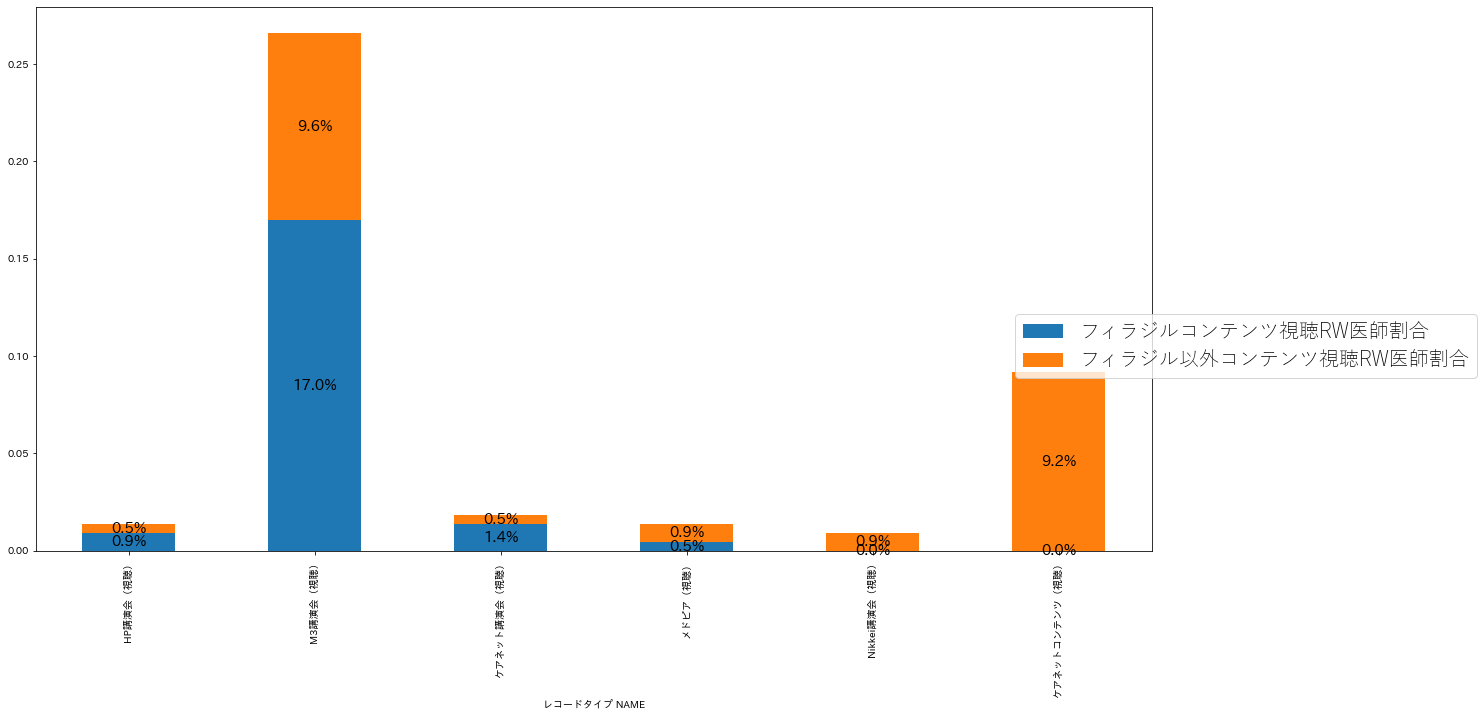

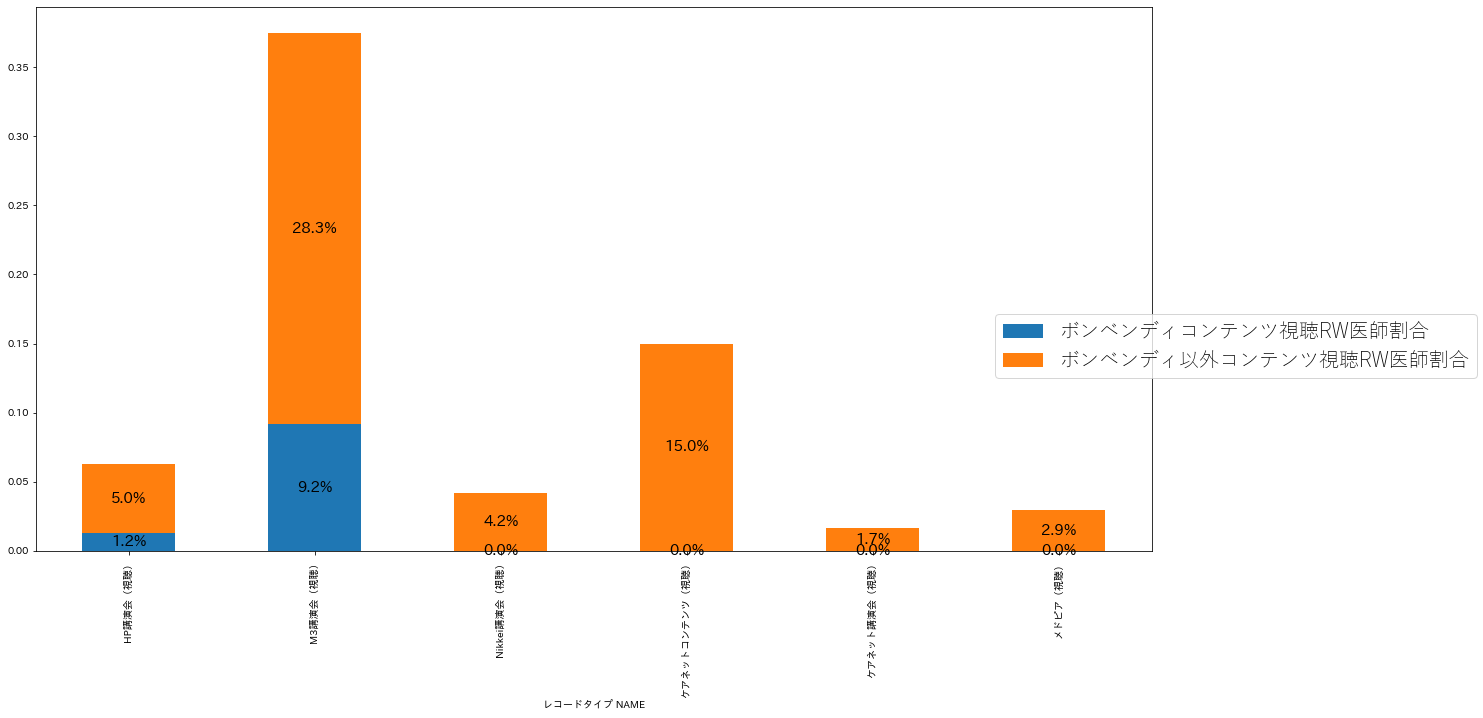

In [188]:
#旧ロジック
for i in list:
    Product1=pd.DataFrame(マルチチャネルデータ_new.loc[(マルチチャネルデータ_new['品目 DESC']==i) & (マルチチャネルデータ_new[i]==1)].groupby(['レコードタイプ NAME','医師 ID'],as_index=False).count().groupby(['レコードタイプ NAME'],as_index=False)['RDBU_RHエリア SORT'].count()).rename(columns={'RDBU_RHエリア SORT':i+'コンテンツ視聴RW医師数'})
    Product2=pd.DataFrame(マルチチャネルデータ_new.loc[(マルチチャネルデータ_new['品目 DESC']!=i) & (マルチチャネルデータ_new[i]==1)].groupby(['レコードタイプ NAME','医師 ID'],as_index=False).count().groupby(['レコードタイプ NAME'],as_index=False)['RDBU_RHエリア SORT'].count()).rename(columns={'RDBU_RHエリア SORT':i+'以外コンテンツ視聴RW医師数'})
    Product=pd.merge(Product1,Product2,on="レコードタイプ NAME",how="outer")
    RW医師数=len(RW医師リスト_new.loc[RW医師リスト_new[i]!=0])
    Product[i+'コンテンツ視聴RW医師割合']=Product[i+'コンテンツ視聴RW医師数'] / RW医師数
    Product[i+'以外コンテンツ視聴RW医師割合']=Product[i+'以外コンテンツ視聴RW医師数'] / RW医師数
    Product_new=Product[['レコードタイプ NAME',i+'コンテンツ視聴RW医師割合',i+'以外コンテンツ視聴RW医師割合']].set_index(['レコードタイプ NAME']).fillna(0)
    Product_new.plot(kind='bar',stacked=True,figsize=(20, 10))
    leg = plt.legend(loc=4, bbox_to_anchor=(1.3, 0.3),prop={'family':'Yu Gothic','weight':'light','size':20})
    ### グラフ表示
    annotating_plots(formatter='percent',stacked = True,colors = 'black',fontsize=15)
    plt.show()

In [73]:
マルチチャネルデータ_new.loc[((マルチチャネルデータ_new['アディノベイト']==1) | (マルチチャネルデータ_new['アドベイト']==1)),'アドベイトF']=1

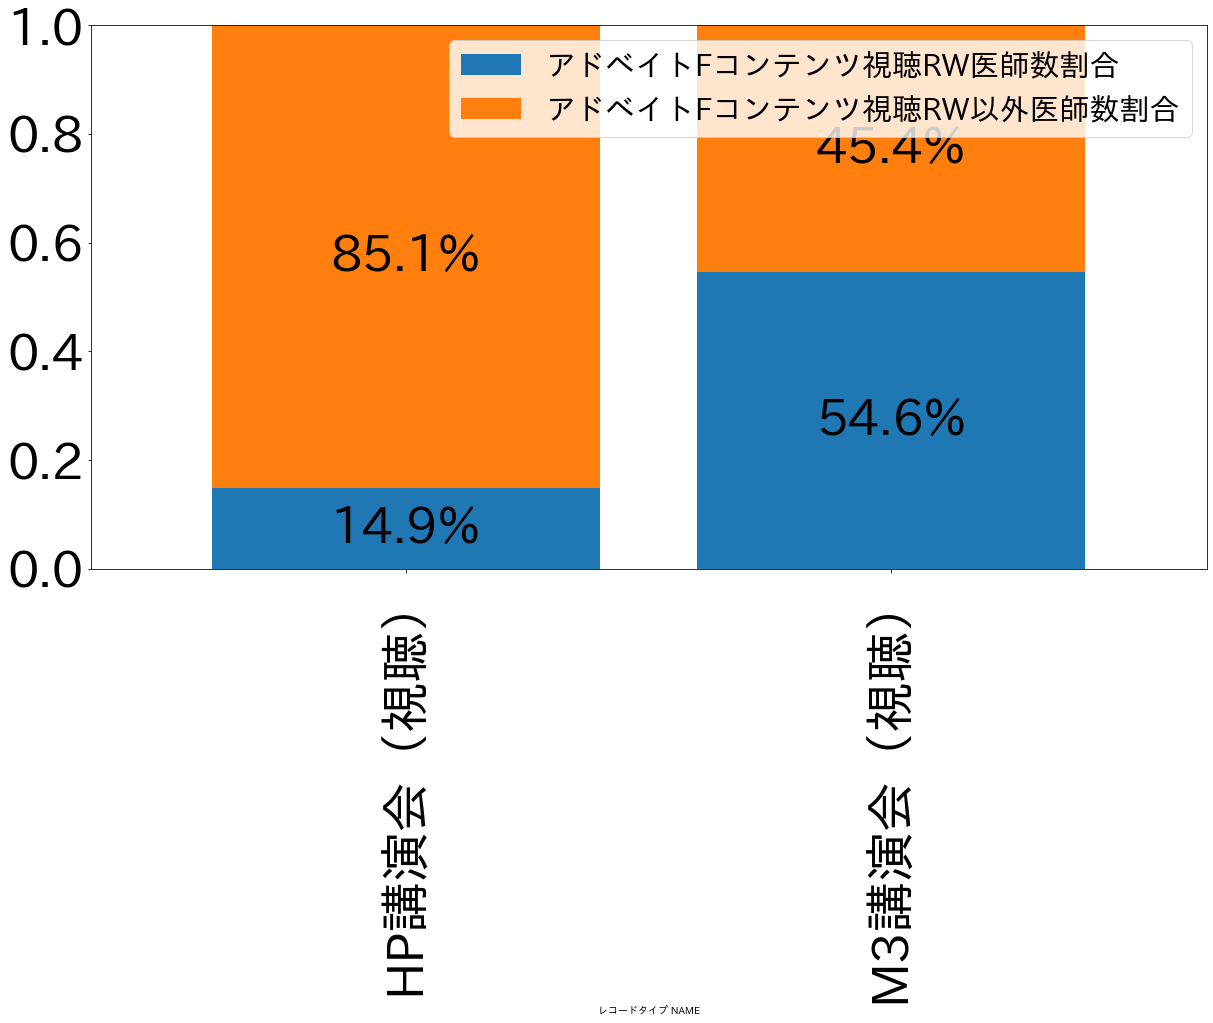

In [89]:
    Product医師リスト=マルチチャネルデータ_new.loc[((マルチチャネルデータ_new['品目 DESC']=="アディノベイト") | (マルチチャネルデータ_new['品目 DESC']=="アドベイト")) & (マルチチャネルデータ_new['アドベイトF']==1)].groupby(['レコードタイプ NAME','医師 ID'],as_index=False).count()              
    Product1=pd.DataFrame(Product医師リスト.groupby(['レコードタイプ NAME'],as_index=False)['RDBU_RHエリア SORT'].count()).rename(columns={'RDBU_RHエリア SORT':'アドベイトFコンテンツ視聴RW医師数'})        
    Product医師以外リスト=マルチチャネルデータ_new.loc[(マルチチャネルデータ_new['品目 DESC']==i) & (マルチチャネルデータ_new['アドベイトF']!=1)].groupby(['レコードタイプ NAME','医師 ID'],as_index=False).count()              
    Product2=pd.DataFrame(Product医師以外リスト.groupby(['レコードタイプ NAME'],as_index=False)['RDBU_RHエリア SORT'].count()).rename(columns={'RDBU_RHエリア SORT':'アドベイトFコンテンツ視聴RW以外医師数'})        
    Product=pd.merge(Product1,Product2,on="レコードタイプ NAME",how="outer")
    Product=Product.fillna(0).sort_values(['レコードタイプ NAME'])
    Product['アドベイトFコンテンツ視聴RW医師数割合']=Product['アドベイトFコンテンツ視聴RW医師数'] / (Product['アドベイトFコンテンツ視聴RW医師数']+Product['アドベイトFコンテンツ視聴RW以外医師数'])
    Product['アドベイトFコンテンツ視聴RW以外医師数割合']=Product['アドベイトFコンテンツ視聴RW以外医師数'] / (Product['アドベイトFコンテンツ視聴RW医師数']+Product['アドベイトFコンテンツ視聴RW以外医師数'])
    Product=Product[Product['レコードタイプ NAME']!="ケアネットコンテンツ（視聴）"]
    Product_new=Product[['レコードタイプ NAME','アドベイトFコンテンツ視聴RW医師数割合','アドベイトFコンテンツ視聴RW以外医師数割合']].set_index(['レコードタイプ NAME']).fillna(0)
    Product_new.plot(kind='bar',stacked=True,figsize=(20, 10),width=0.8)
    # leg = plt.legend(loc=4, bbox_to_anchor=(1.3, 0.3),prop={'family':'Yu Gothic','weight':'light','size':20})
    ### グラフ表示
    plt.ylim(0,1) #y軸範囲指定
    plt.xticks(fontsize =50)
    plt.yticks(fontsize =50)
    annotating_plots(formatter='percent',stacked = True,colors = 'black',fontsize=50)
    plt.legend(fontsize=30) 
    plt.show()

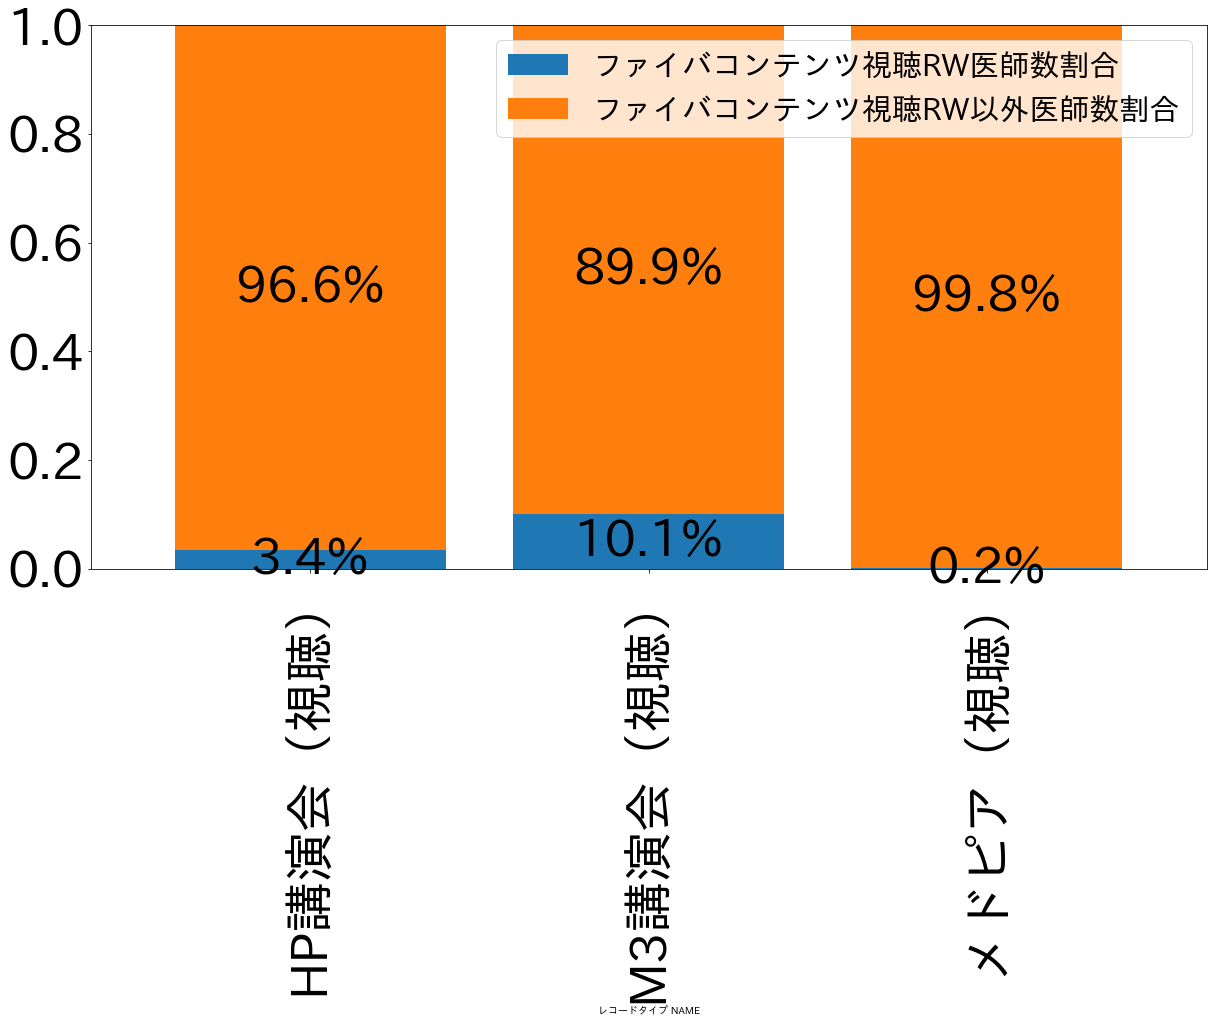

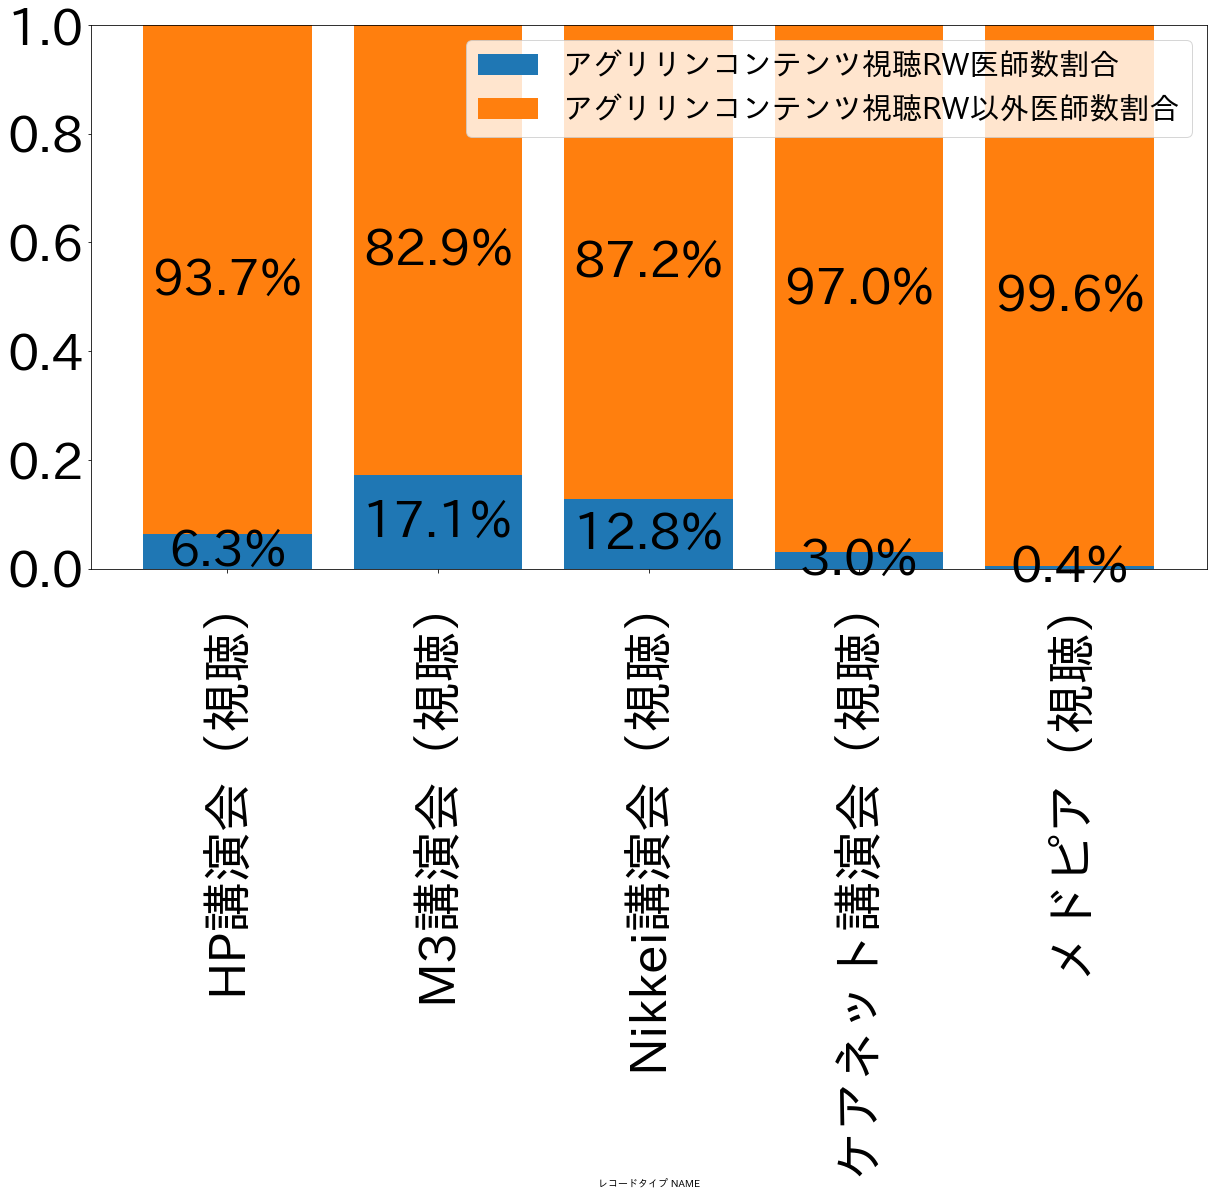

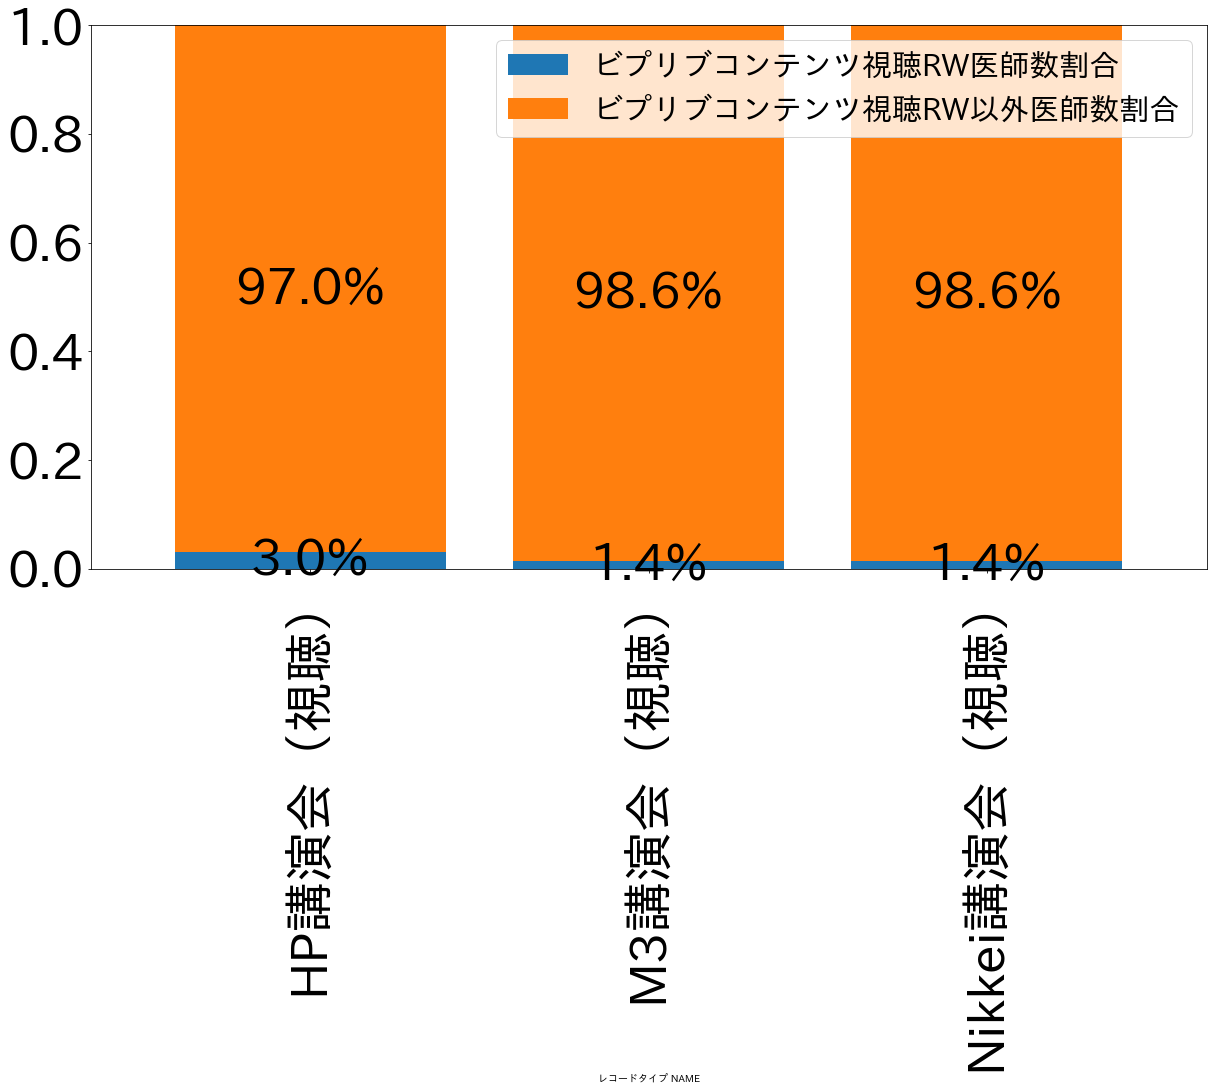

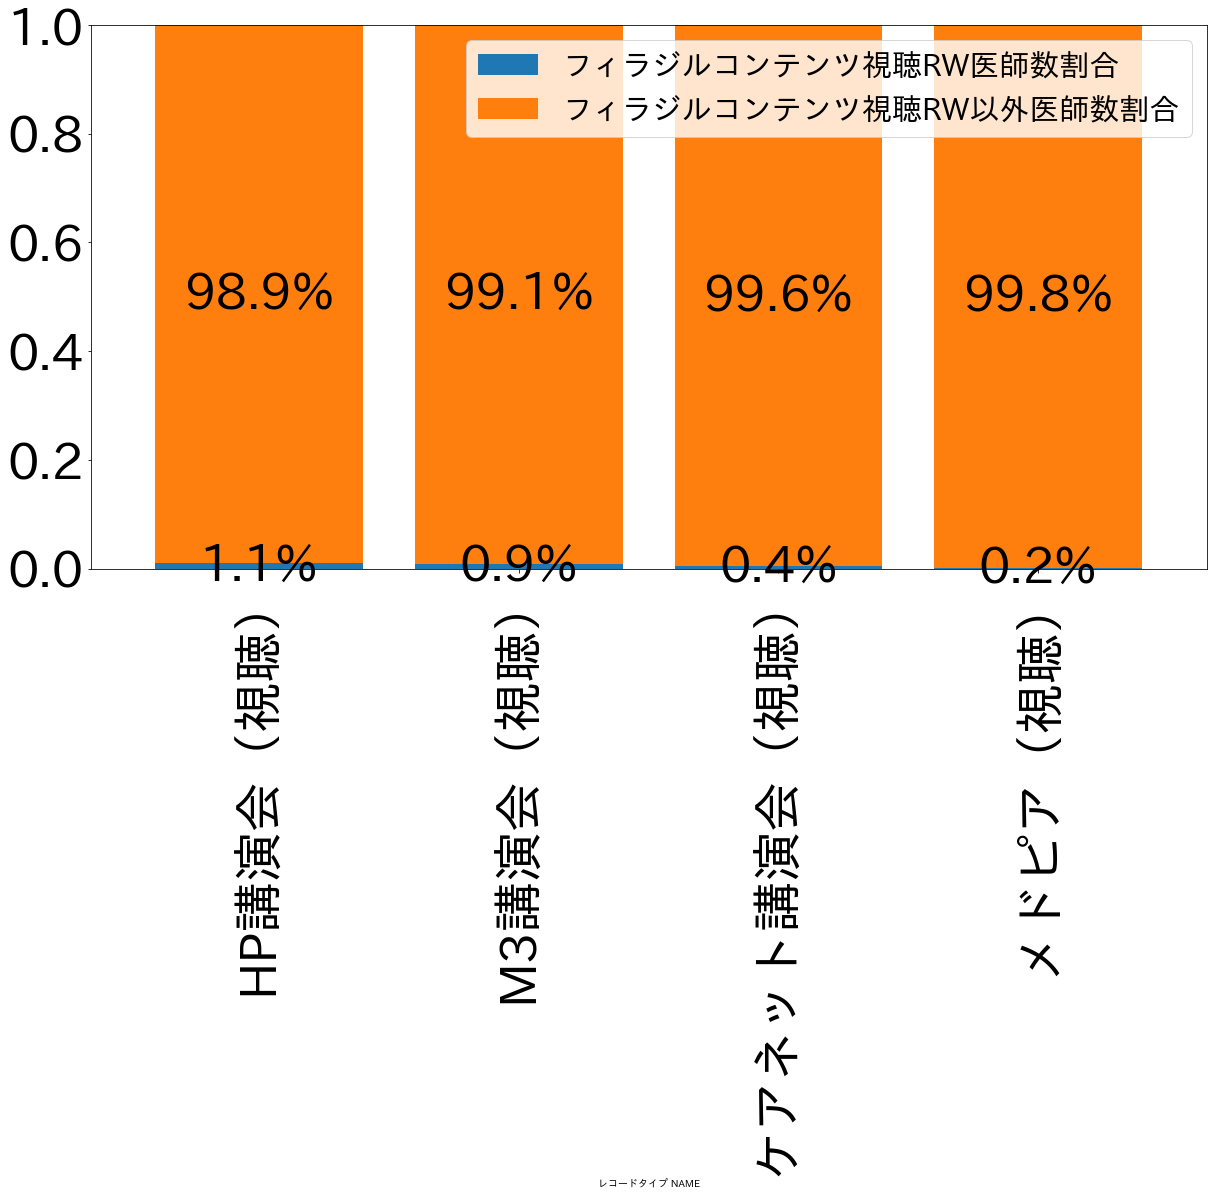

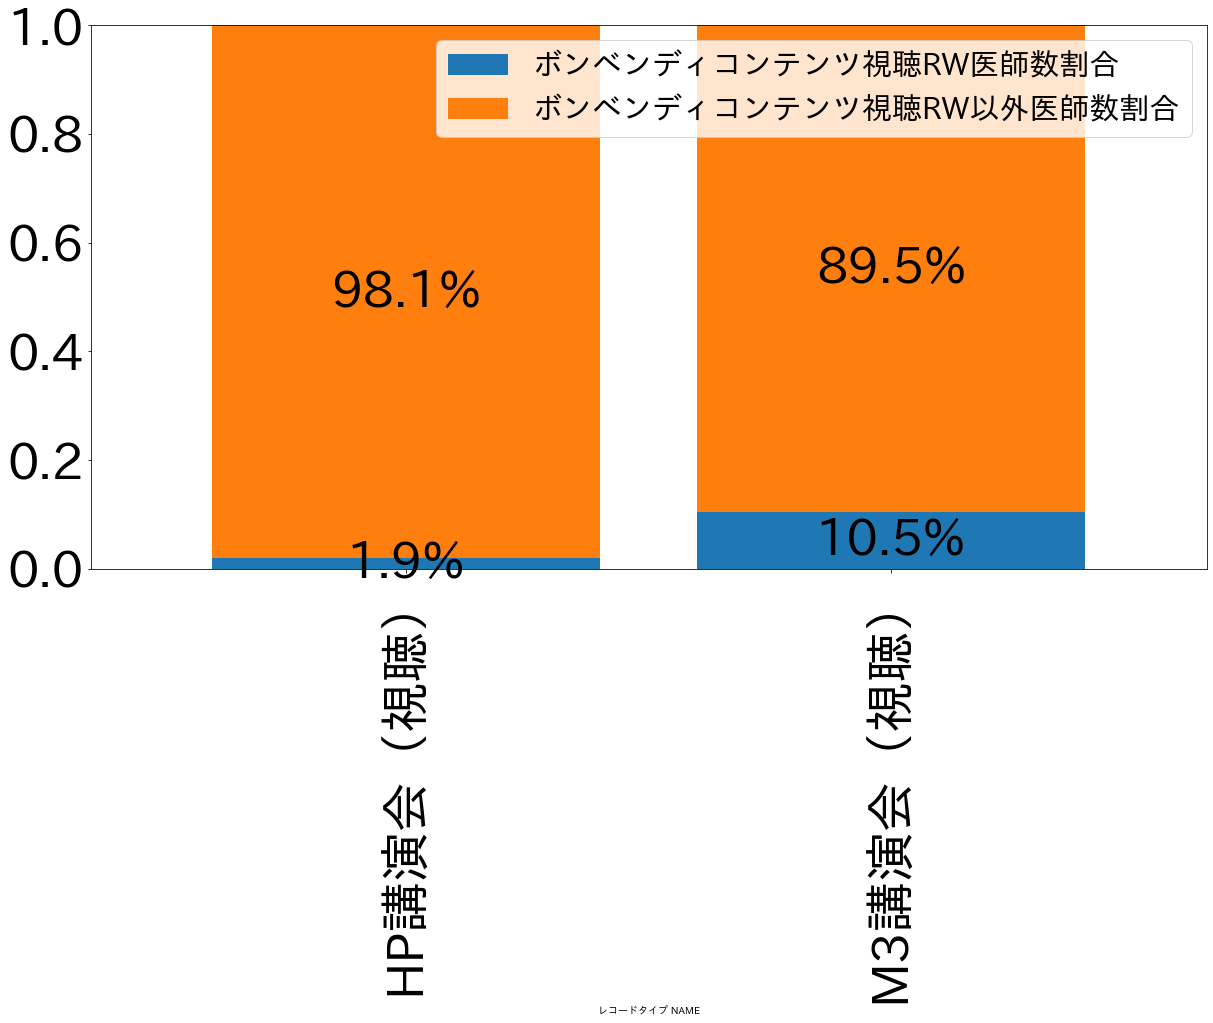

In [90]:
for i in list:
    Product医師リスト=マルチチャネルデータ_new.loc[(マルチチャネルデータ_new['品目 DESC']==i) & (マルチチャネルデータ_new[i]==1)].groupby(['レコードタイプ NAME','医師 ID'],as_index=False).count()              
    Product1=pd.DataFrame(Product医師リスト.groupby(['レコードタイプ NAME'],as_index=False)['RDBU_RHエリア SORT'].count()).rename(columns={'RDBU_RHエリア SORT':i+'コンテンツ視聴RW医師数'})        
    Product医師以外リスト=マルチチャネルデータ_new.loc[(マルチチャネルデータ_new['品目 DESC']==i) & (マルチチャネルデータ_new[i]!=1)].groupby(['レコードタイプ NAME','医師 ID'],as_index=False).count()              
    Product2=pd.DataFrame(Product医師以外リスト.groupby(['レコードタイプ NAME'],as_index=False)['RDBU_RHエリア SORT'].count()).rename(columns={'RDBU_RHエリア SORT':i+'コンテンツ視聴RW以外医師数'})        
    Product=pd.merge(Product1,Product2,on="レコードタイプ NAME",how="outer")
    Product=Product.fillna(0).sort_values(['レコードタイプ NAME'])
    Product[i+'コンテンツ視聴RW医師数割合']=Product[i+'コンテンツ視聴RW医師数'] / (Product[i+'コンテンツ視聴RW医師数']+Product[i+'コンテンツ視聴RW以外医師数'])
    Product[i+'コンテンツ視聴RW以外医師数割合']=Product[i+'コンテンツ視聴RW以外医師数'] / (Product[i+'コンテンツ視聴RW医師数']+Product[i+'コンテンツ視聴RW以外医師数'])
    Product=Product[Product['レコードタイプ NAME']!="ケアネットコンテンツ（視聴）"]
    Product_new=Product[['レコードタイプ NAME',i+'コンテンツ視聴RW医師数割合',i+'コンテンツ視聴RW以外医師数割合']].set_index(['レコードタイプ NAME']).fillna(0)
    Product_new.plot(kind='bar',stacked=True,figsize=(20, 10),width=0.8)
    # leg = plt.legend(loc=4, bbox_to_anchor=(1.3, 0.3),prop={'family':'Yu Gothic','weight':'light','size':20})
    ### グラフ表示
    plt.ylim(0,1) #y軸範囲指定
    plt.xticks(fontsize =50)
    plt.yticks(fontsize =50)
    annotating_plots(formatter='percent',stacked = True,colors = 'black',fontsize=50)
    plt.legend(fontsize=30) 
    plt.show()

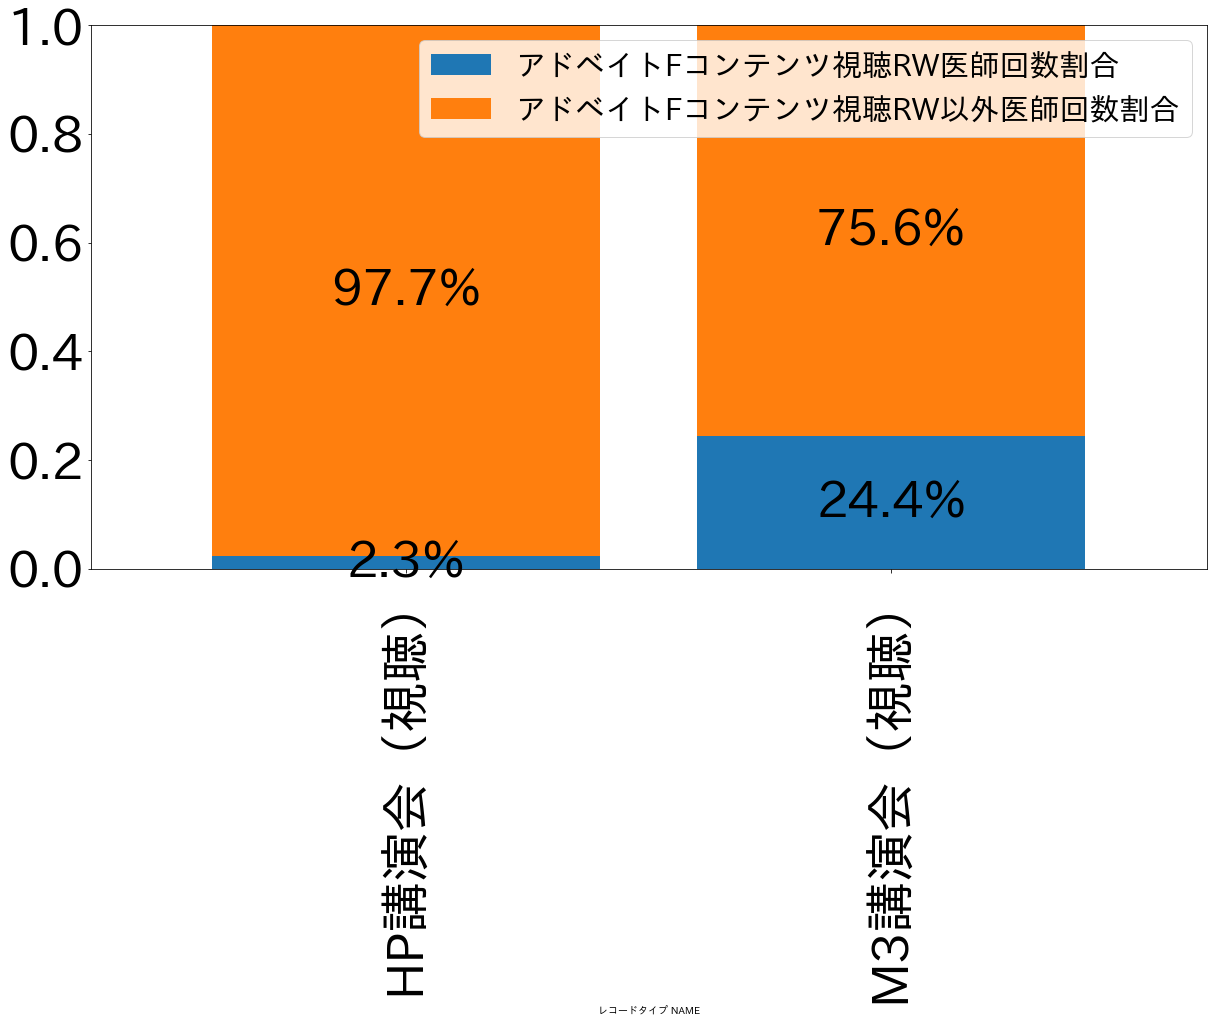

In [171]:
Product1=マルチチャネルデータ_new.loc[((マルチチャネルデータ_new['品目 DESC']=="アディノベイト") | (マルチチャネルデータ_new['品目 DESC']=="アドベイト")) & (マルチチャネルデータ_new['アドベイトF']==1)].groupby(['レコードタイプ NAME'],as_index=False)['回数（重複なし）'].sum().rename(columns={'回数（重複なし）':'アドベイトFコンテンツ視聴RW医師回数'})            
Product2=マルチチャネルデータ_new.loc[((マルチチャネルデータ_new['品目 DESC']=="アディノベイト") | (マルチチャネルデータ_new['品目 DESC']=="アドベイト")) & (マルチチャネルデータ_new['アドベイトF']!=1)].groupby(['レコードタイプ NAME'],as_index=False)['回数（重複なし）'].sum().rename(columns={'回数（重複なし）':'アドベイトFコンテンツ視聴RW以外医師回数'})   
Product=pd.merge(Product1,Product2,on="レコードタイプ NAME",how="outer")
Product=Product.fillna(0).sort_values(['レコードタイプ NAME'])
Product['アドベイトFコンテンツ視聴RW医師回数割合']=Product['アドベイトFコンテンツ視聴RW医師回数'] / (Product['アドベイトFコンテンツ視聴RW医師回数']+Product['アドベイトFコンテンツ視聴RW以外医師回数'])
Product['アドベイトFコンテンツ視聴RW以外医師回数割合']=Product['アドベイトFコンテンツ視聴RW以外医師回数'] / (Product['アドベイトFコンテンツ視聴RW医師回数']+Product['アドベイトFコンテンツ視聴RW以外医師回数'])
Product=Product[Product['レコードタイプ NAME']!="ケアネットコンテンツ（視聴）"]
Product_new=Product[['レコードタイプ NAME','アドベイトFコンテンツ視聴RW医師回数割合','アドベイトFコンテンツ視聴RW以外医師回数割合']].set_index(['レコードタイプ NAME']).fillna(0)
Product_new.plot(kind='bar',stacked=True,figsize=(20, 10),width=0.8)
# leg = plt.legend(loc=4, bbox_to_anchor=(1.3, 0.3),prop={'family':'Yu Gothic','weight':'light','size':20})
### グラフ表示
plt.ylim(0,1) #y軸範囲指定
plt.xticks(fontsize =50)
plt.yticks(fontsize =50)
annotating_plots(formatter='percent',stacked = True,colors = 'black',fontsize=50)
plt.legend(fontsize=30) 
plt.show()

Product_アドベイトF=Product.set_index(['レコードタイプ NAME'])

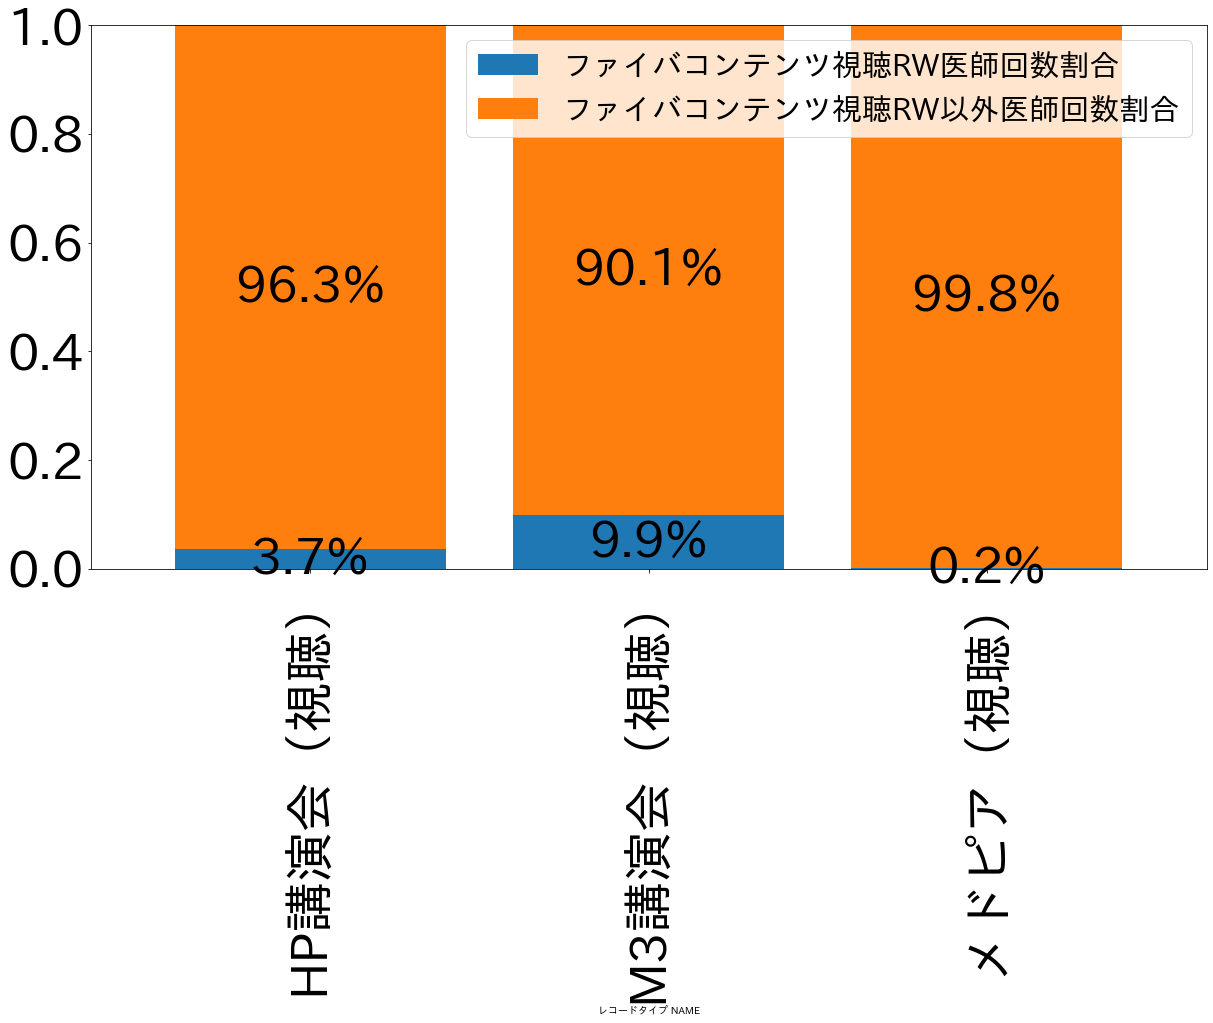

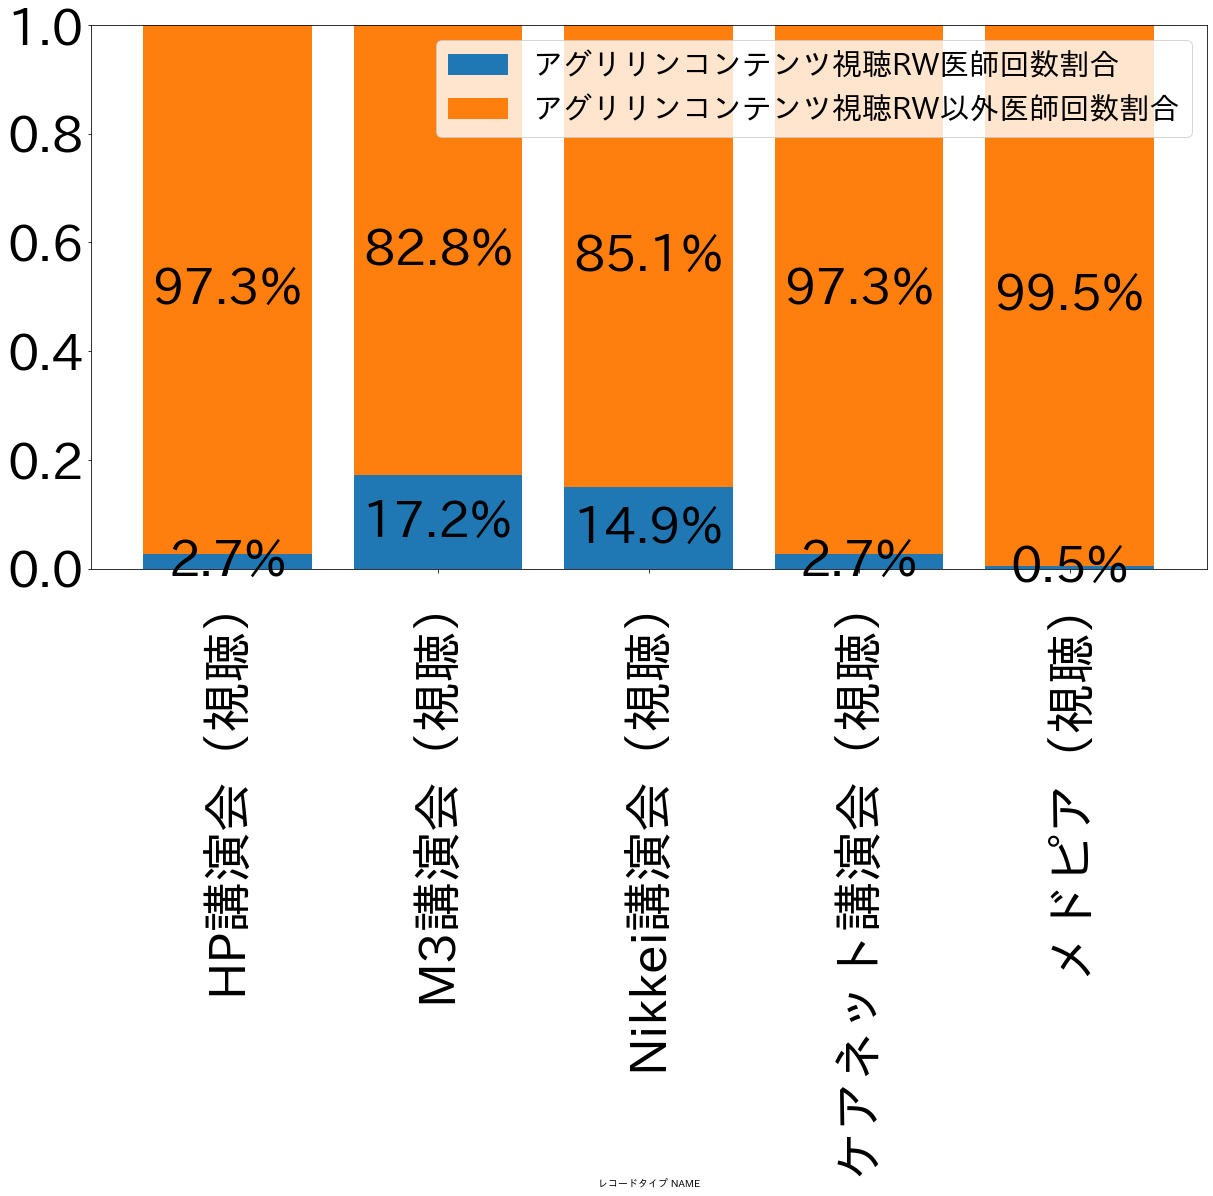

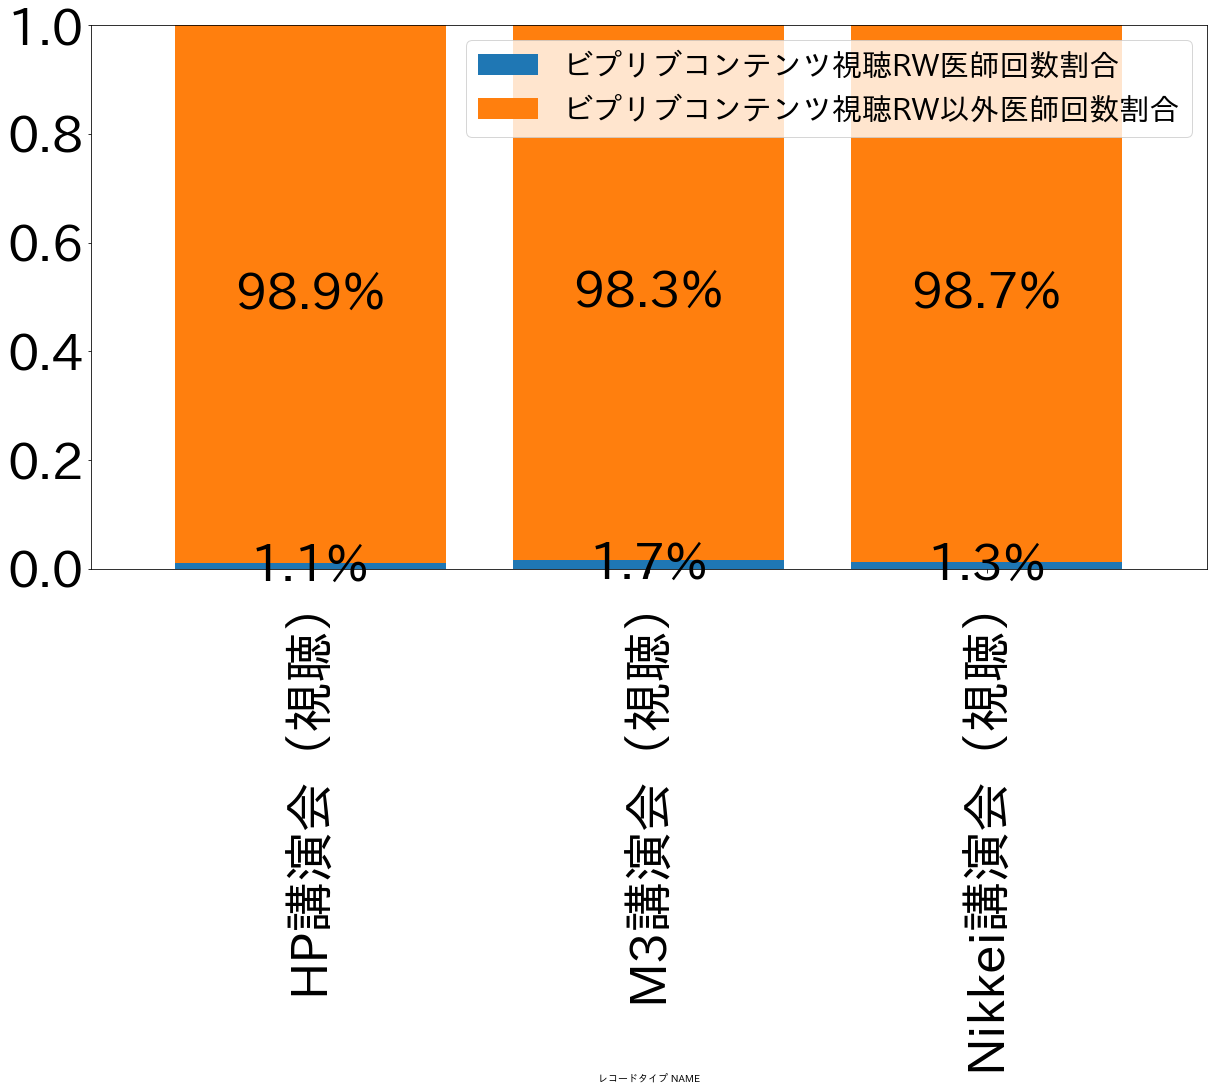

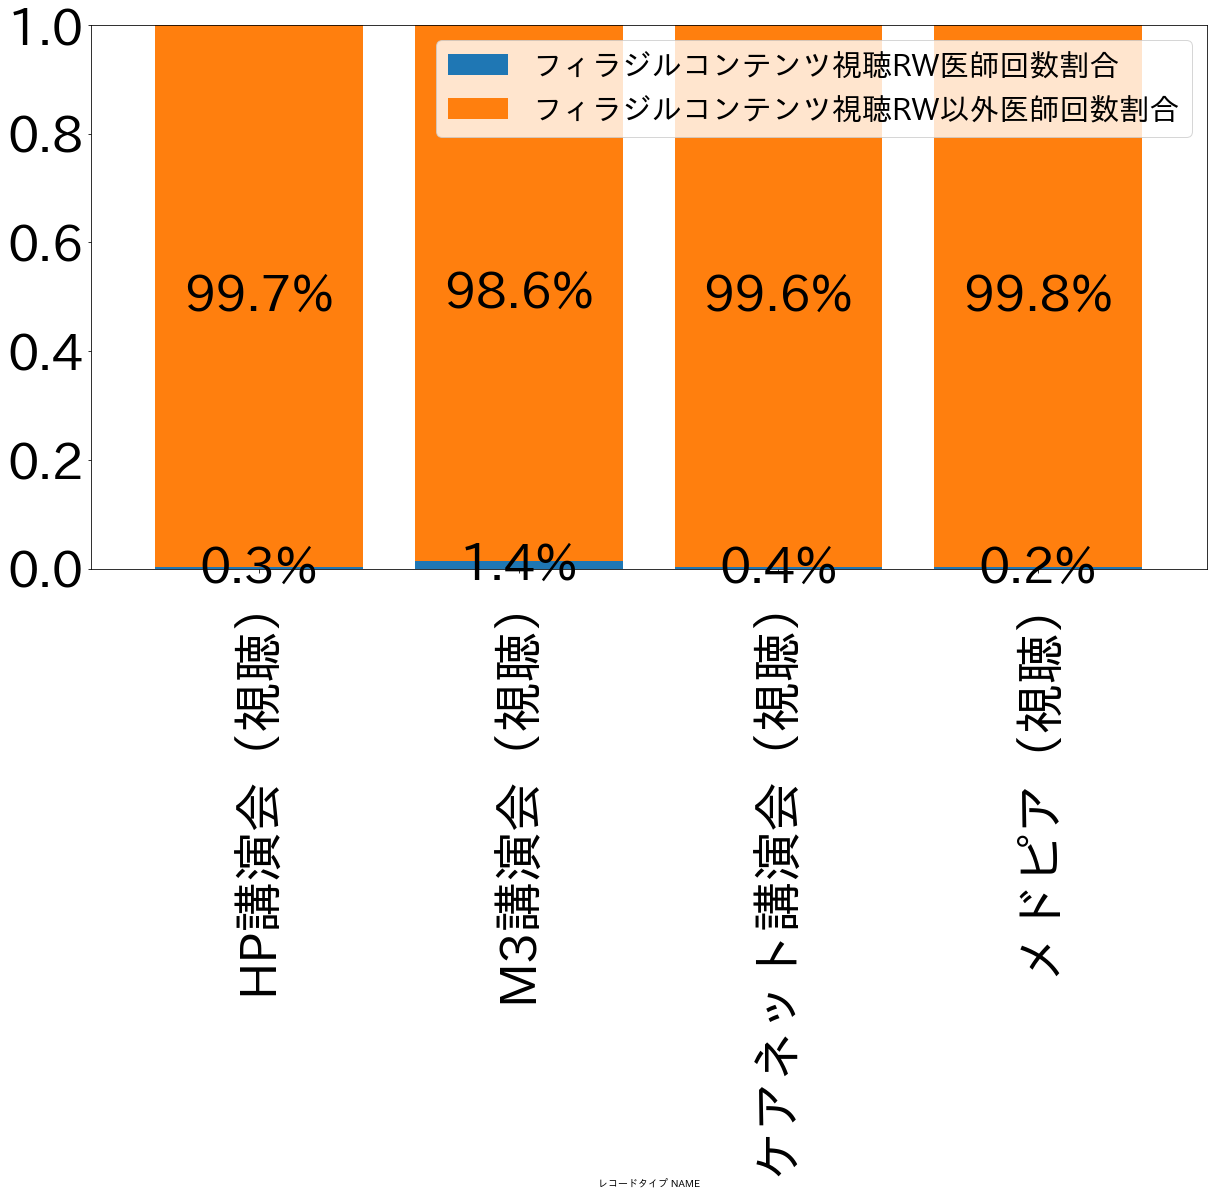

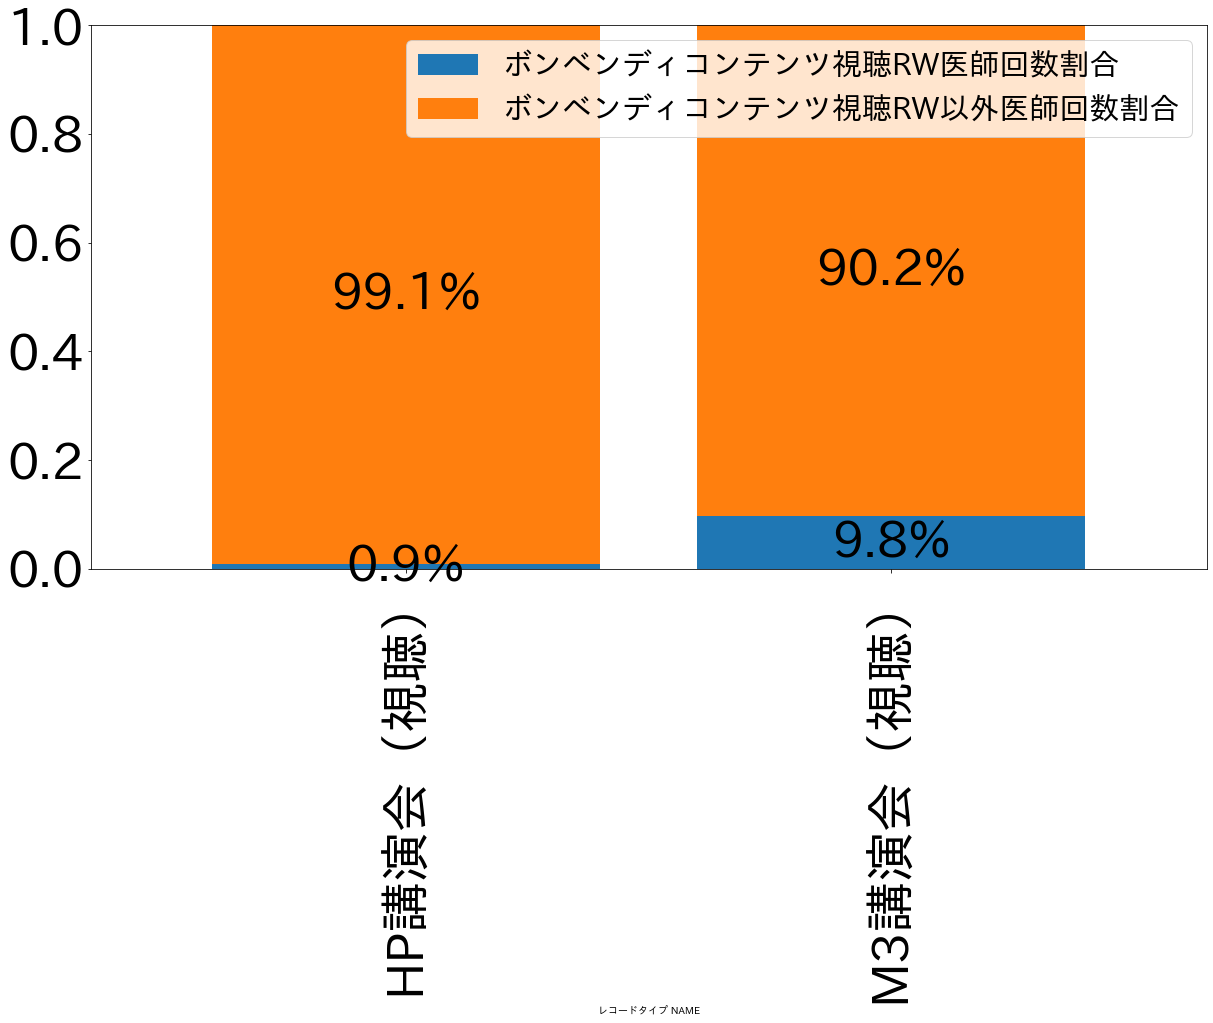

C:\Users\qys2804\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [169]:
Product_all=[]

for i in list:
    Product1=マルチチャネルデータ_new.loc[(マルチチャネルデータ_new['品目 DESC']==i) & (マルチチャネルデータ_new[i]==1)].groupby(['レコードタイプ NAME'],as_index=False)['回数（重複なし）'].sum().rename(columns={'回数（重複なし）':i+'コンテンツ視聴RW医師回数'})            
    Product2=マルチチャネルデータ_new.loc[(マルチチャネルデータ_new['品目 DESC']==i) & (マルチチャネルデータ_new[i]!=1)].groupby(['レコードタイプ NAME'],as_index=False)['回数（重複なし）'].sum().rename(columns={'回数（重複なし）':i+'コンテンツ視聴RW以外医師回数'})   
    Product=pd.merge(Product1,Product2,on="レコードタイプ NAME",how="outer")
    Product=Product.fillna(0).sort_values(['レコードタイプ NAME'])
    Product[i+'コンテンツ視聴RW医師回数割合']=Product[i+'コンテンツ視聴RW医師回数'] / (Product[i+'コンテンツ視聴RW医師回数']+Product[i+'コンテンツ視聴RW以外医師回数'])
    Product[i+'コンテンツ視聴RW以外医師回数割合']=Product[i+'コンテンツ視聴RW以外医師回数'] / (Product[i+'コンテンツ視聴RW医師回数']+Product[i+'コンテンツ視聴RW以外医師回数'])
    Product=Product[Product['レコードタイプ NAME']!="ケアネットコンテンツ（視聴）"]
    Product_new=Product[['レコードタイプ NAME',i+'コンテンツ視聴RW医師回数割合',i+'コンテンツ視聴RW以外医師回数割合']].set_index(['レコードタイプ NAME']).fillna(0)
    Product_new.plot(kind='bar',stacked=True,figsize=(20, 10),width=0.8)
    # leg = plt.legend(loc=4, bbox_to_anchor=(1.3, 0.3),prop={'family':'Yu Gothic','weight':'light','size':20})
    ### グラフ表示
    plt.ylim(0,1) #y軸範囲指定
    plt.xticks(fontsize =50)
    plt.yticks(fontsize =50)
    annotating_plots(formatter='percent',stacked = True,colors = 'black',fontsize=50)
    plt.legend(fontsize=30) 
    plt.show()

    Product_all.append(Product.set_index(['レコードタイプ NAME']))

Product_all=pd.concat(Product_all,axis=1).fillna(0)

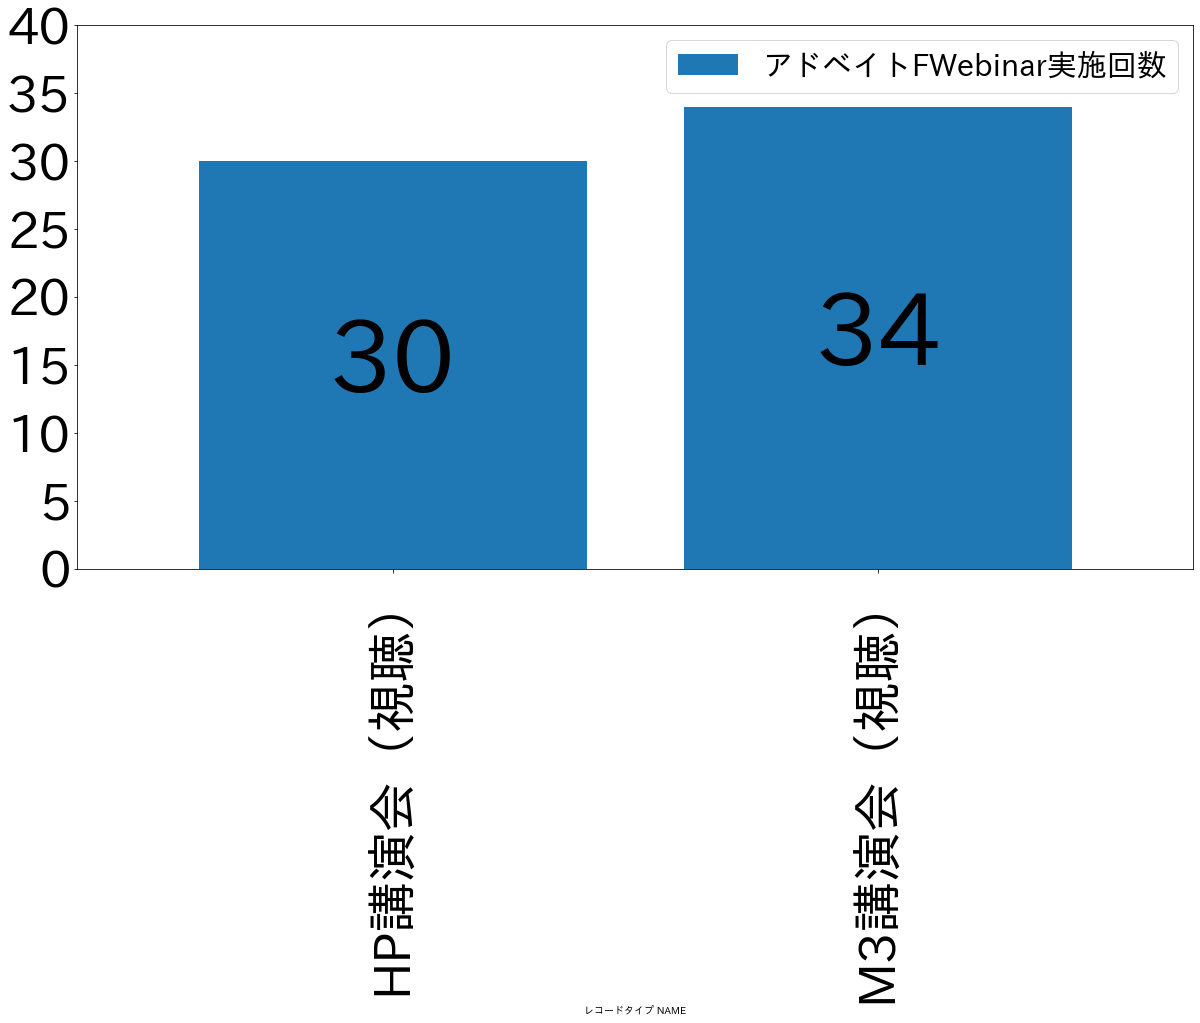

In [140]:
    Product=pd.DataFrame(マルチチャネルデータ_new.loc[((マルチチャネルデータ_new['品目 DESC']=="アディノベイト") | (マルチチャネルデータ_new['品目 DESC']=="アドベイト")) & (マルチチャネルデータ_new['レコードタイプ NAME']!="ケアネットコンテンツ（視聴）")].groupby(['レコードタイプ NAME','開催日/配信日 ID'])['回数（重複なし）'].sum().groupby(['レコードタイプ NAME']).count()).rename(columns={'回数（重複なし）':'アドベイトFWebinar実施回数'})
    Product.plot(kind='bar',stacked=True,figsize=(20, 10),width=0.8)
    # leg = plt.legend(loc=4, bbox_to_anchor=(1.3, 0.3),prop={'family':'Yu Gothic','weight':'light','size':20})
    ### グラフ表示
    plt.ylim(0,40) #y軸範囲指定
    plt.xticks(fontsize =50)
    plt.yticks(fontsize =50)
    annotating_plots(formatter=int,stacked = True,colors = 'black',fontsize=100)
    plt.legend(fontsize=30) 
    plt.show()

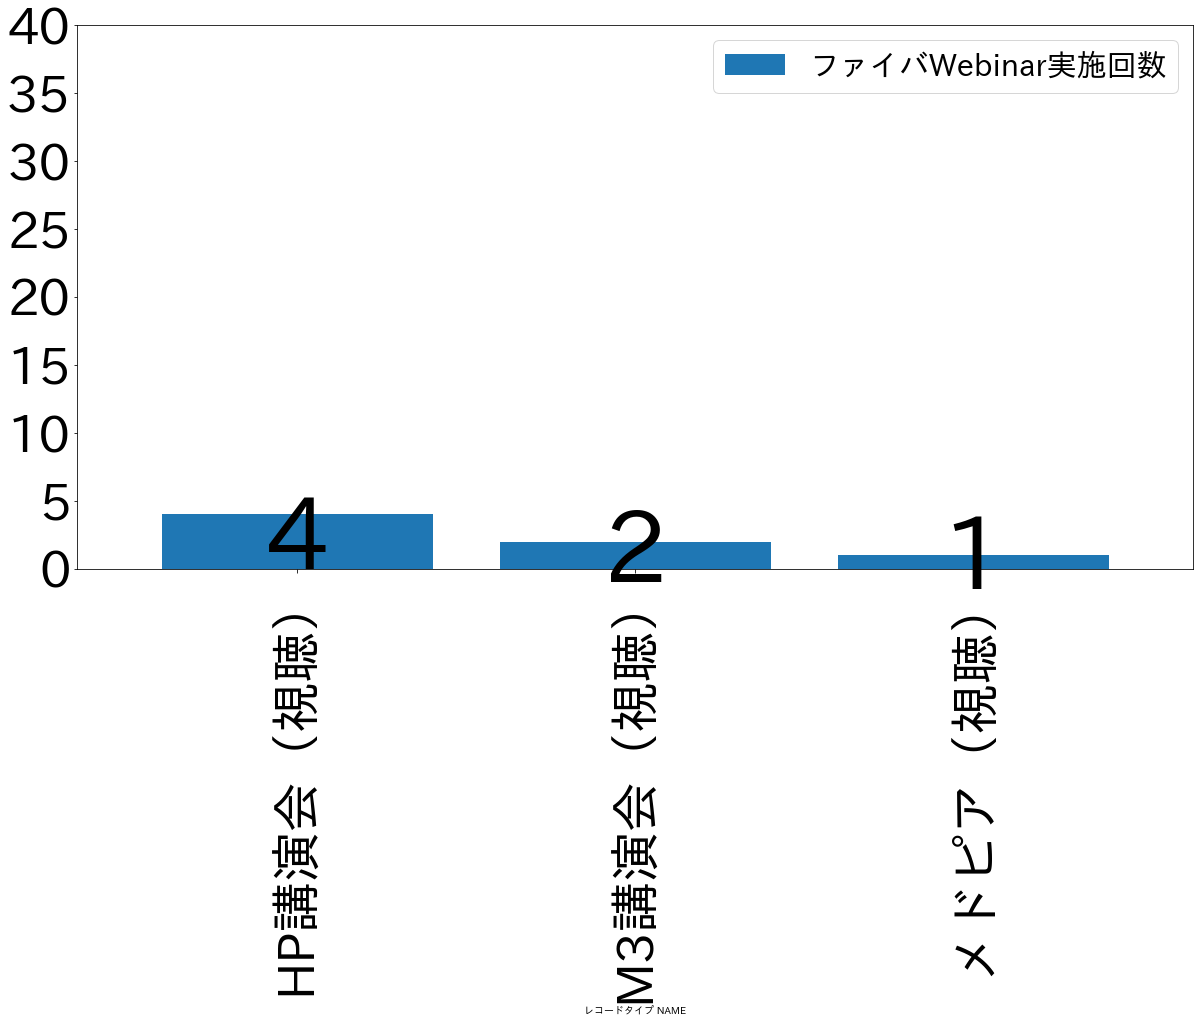

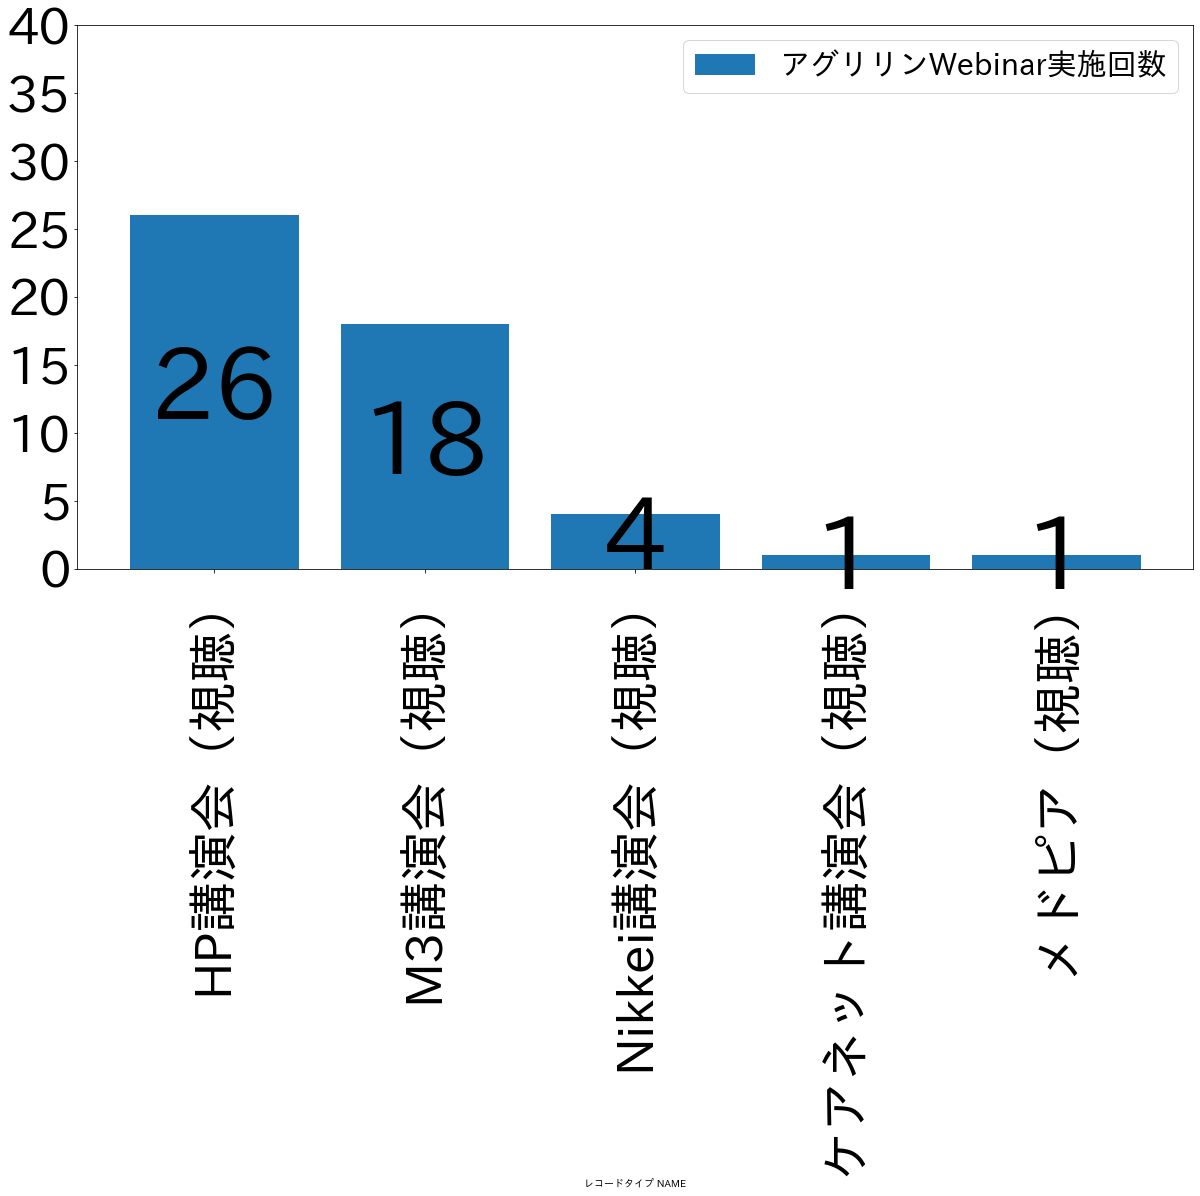

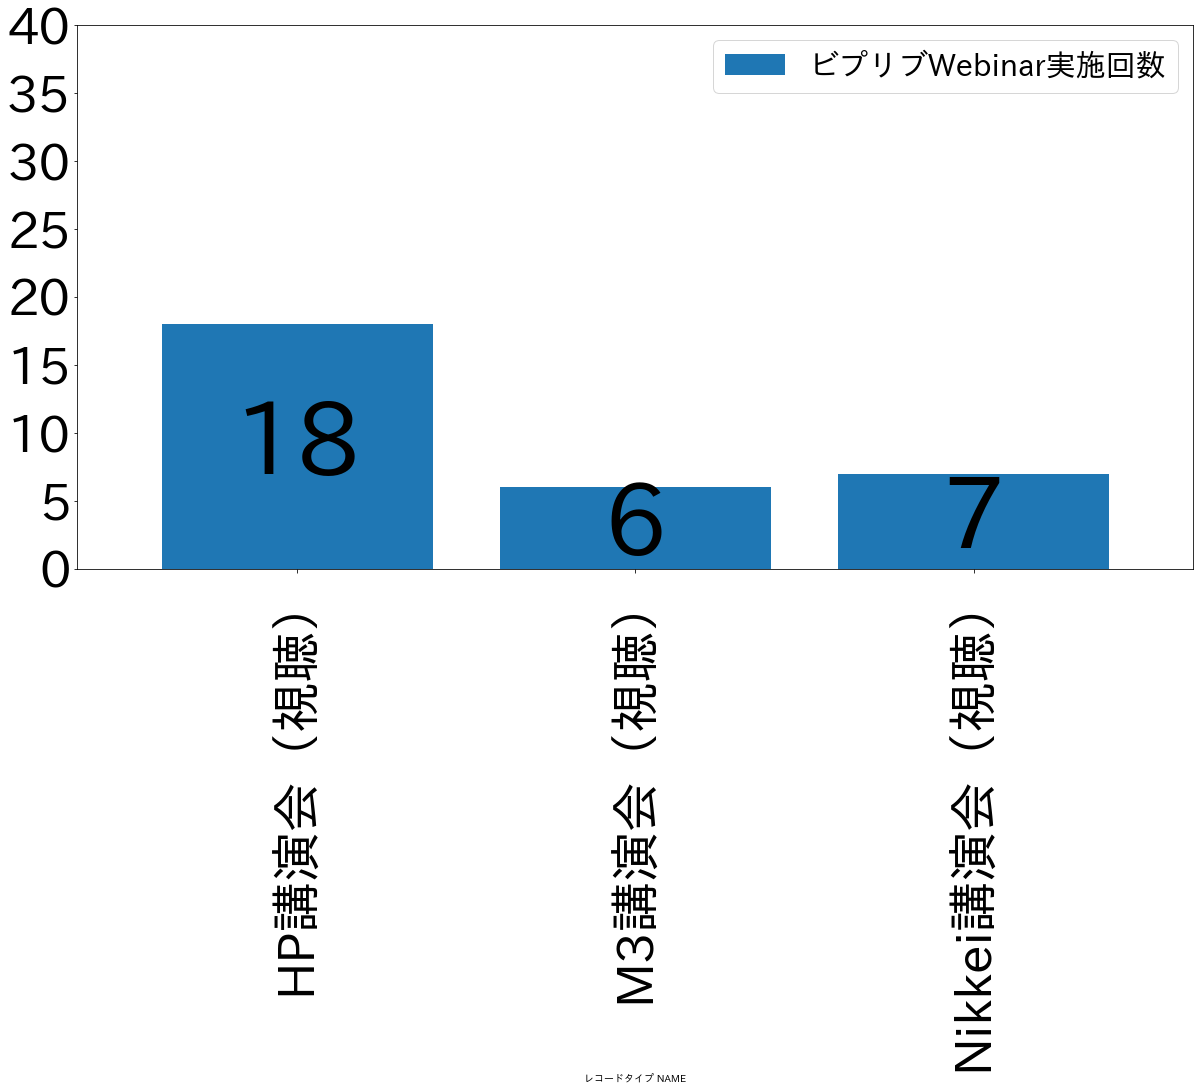

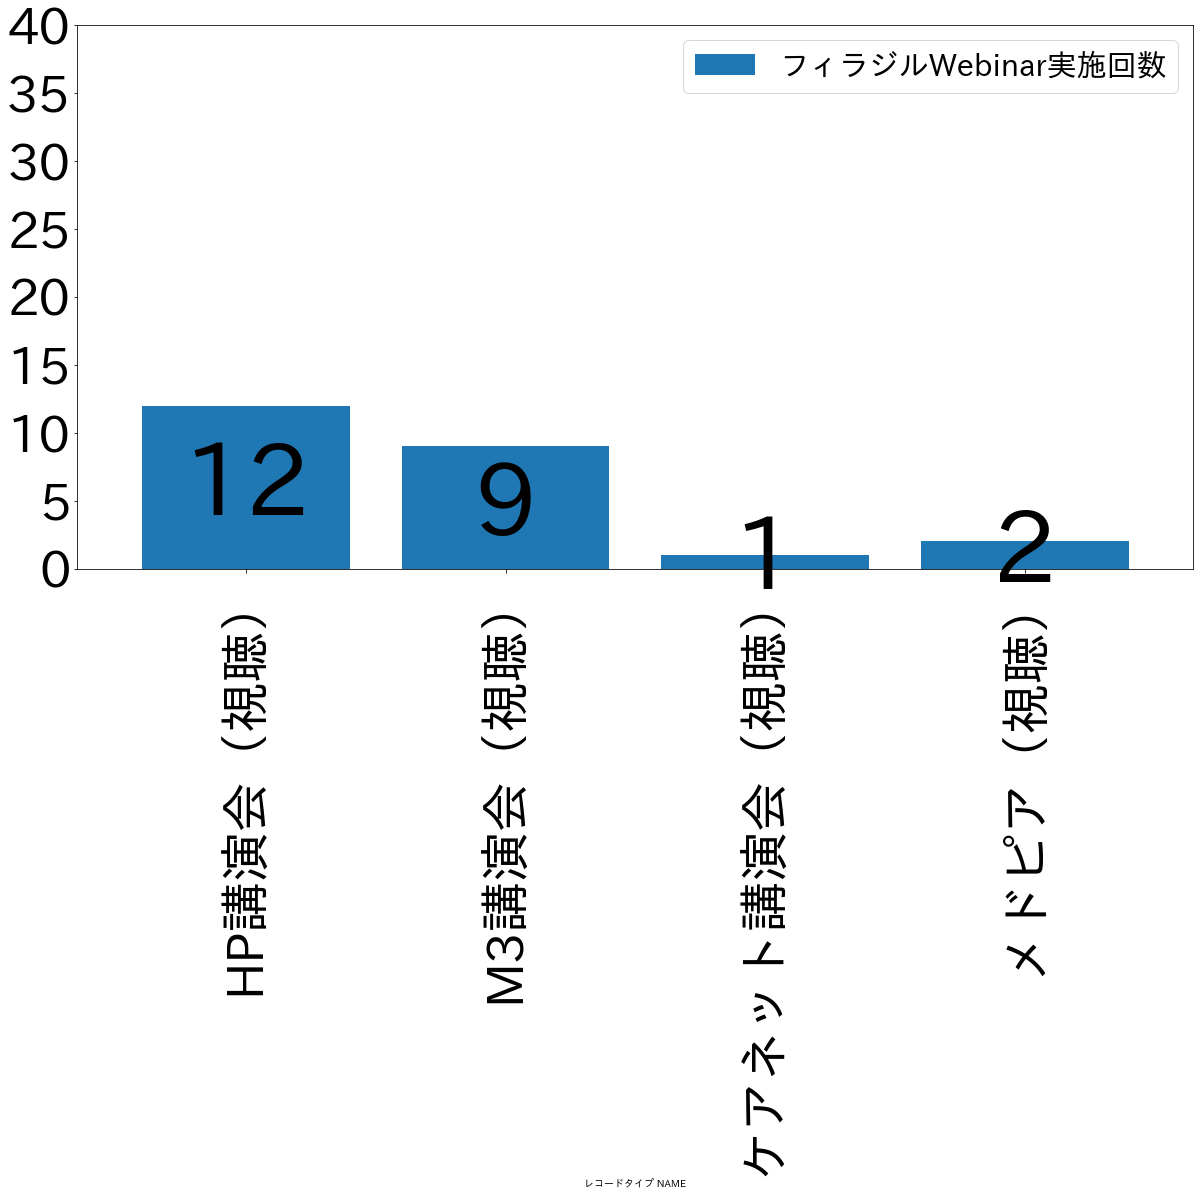

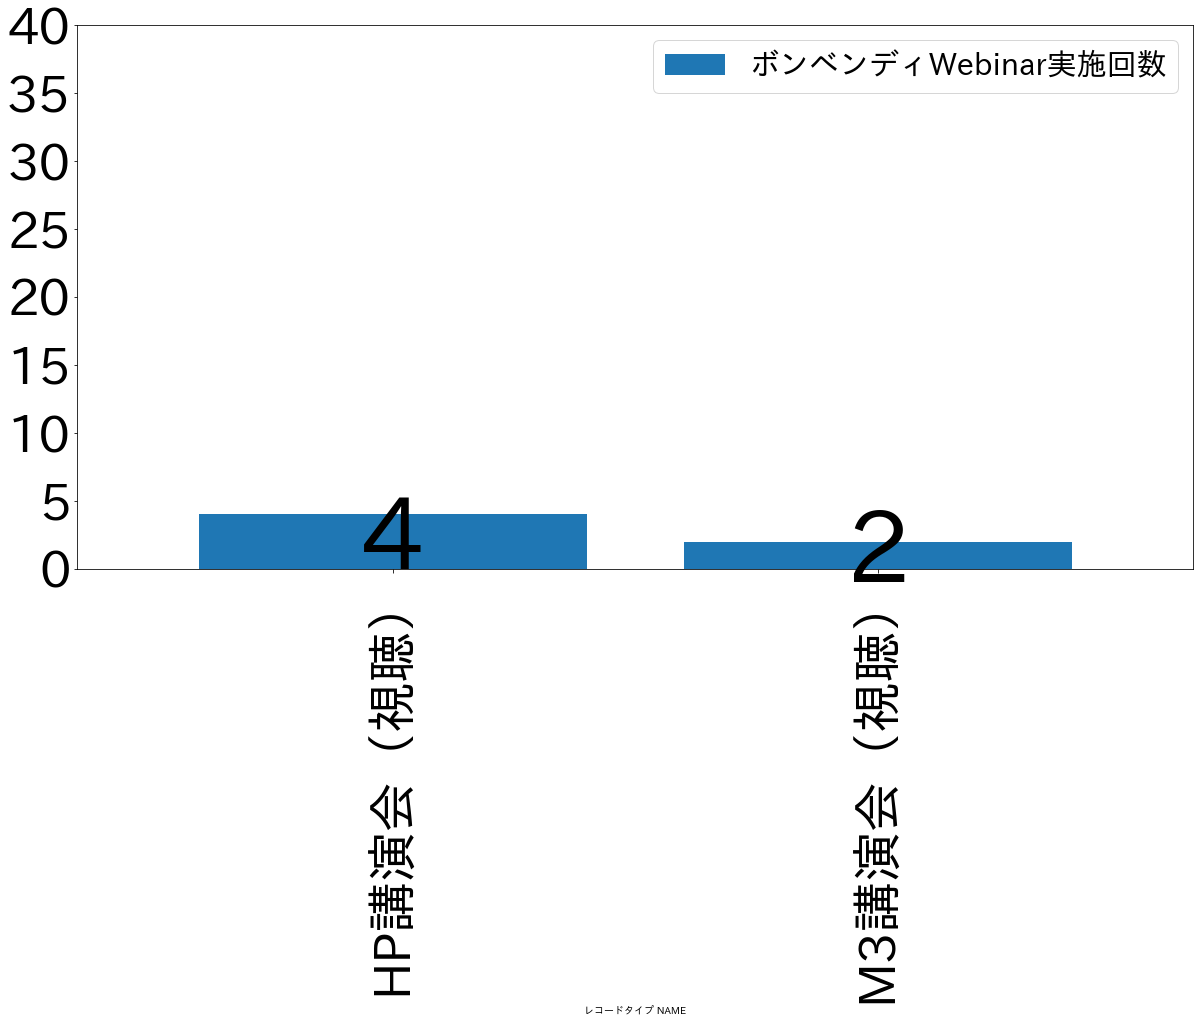

In [142]:
for i in list:
    Product=pd.DataFrame(マルチチャネルデータ_new.loc[(マルチチャネルデータ_new['品目 DESC']==i) & (マルチチャネルデータ_new['レコードタイプ NAME']!="ケアネットコンテンツ（視聴）")].groupby(['レコードタイプ NAME','開催日/配信日 ID'])['回数（重複なし）'].sum().groupby(['レコードタイプ NAME']).count()).rename(columns={'回数（重複なし）':i+'Webinar実施回数'})
    Product.plot(kind='bar',stacked=True,figsize=(20, 10),width=0.8)
    # leg = plt.legend(loc=4, bbox_to_anchor=(1.3, 0.3),prop={'family':'Yu Gothic','weight':'light','size':20})
    ### グラフ表示
    plt.ylim(0,40) #y軸範囲指定
    plt.xticks(fontsize =50)
    plt.yticks(fontsize =50)
    annotating_plots(formatter=int,stacked = True,colors = 'Black',fontsize=100)
    plt.legend(fontsize=30) 
    plt.show()

In [172]:
Product_all=pd.concat([Product_all,Product_アドベイトF],axis=1).fillna(0)

C:\Users\qys2804\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [175]:
Product_all.to_excel('Z:\\講演会チャネル調査\\Product_all.xlsx', encoding='utf_8_sig')